# 📌 KASDD by AlgoHack

## 🥷 Anggota Kelompok
- Amira Nisrina Nashita (2106751676)
- Davyn Reinhard Santoso (2106751083)
- Jeremy Alva Prathama (2106640354)
- Wayan Angga Putra Aldita (2106650065)

## 🔖 References

- https://guhanesvar.medium.com/feature-selection-based-on-mutual-information-gain-for-classification-and-regression-d0f86ea5262a
- https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fdatascience.stackexchange.com%2Fquestions%2F36049%2Fhow-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa
- https://saturncloud.io/blog/how-to-draw-a-scatter-trend-line-on-matplotlib-using-python-pandas
- https://machinelearningmastery.com/random-forest-ensembles-with-xgboost
- https://www.the-analytics.club/how-to-check-if-data-is-imbalanced
- https://medium.com/codeximbalanced-data-in-classification-problem-2ac08e146fa7
- https://www.educative.io/answers/classification-using-xgboost-in-python

## 📥 Import Library & Dataset

### 📦 Libraries

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp
import scipy.cluster.hierarchy as shc
import xgboost as xgb

from decimal import Decimal
from numpy.polynomial.polynomial import polyfit
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif, SelectKBest, mutual_info_regression, SelectPercentile, mutual_info_regression, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from xgboost import XGBRFClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

### 🗃️ Dataset

In [ ]:
df = pd.read_csv('EuropeanInvestmentManagement_train.csv')

In [ ]:
col_ticker = df["ticker"]

## 📰 Description

### 📍 Shape

Initialized function to read a Dataframe shape

In [ ]:
def shape_overview(df):
  num_rows, num_columns = df.shape
  print(f"The DataFrame has {num_rows} rows and {num_columns} columns.")

In [ ]:
shape_overview(df)

The DataFrame has 22420 rows and 117 columns.


### 📍 Structure

In [ ]:
def display_df_structure(df):
  info_as_df = pd.DataFrame({
      "Rows with values": df.count(),
      "HasNaN": df.isna().sum().any(),
      "HasNull": df.isnull().sum().any(),
      "Dtype": df.dtypes
  })

  print("All columns")
  with pd.option_context('display.max_rows', None, 'display.max_columns', None):
      print(info_as_df)

### 📍 Overview

In [ ]:
df.head()

,ticker,category,dividend_frequency,equity_style,equity_size,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,...,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down,rating
0,0P000153IG,Global Flex-Cap Equity,NaN,Value,Large,248.25,10.66,1.00,0.92,6.19,...,14.75,1.85,3.86,8.01,-8.18,-4.63,NaN,16,6,3.0
1,F00000OUR6,US Mid-Cap Equity,Annually,Blend,Medium,124.69,23.06,1.97,1.70,12.07,...,8.64,9.40,6.72,9.26,-6.20,-4.92,9.93,16,7,3.0
2,F00000OTTT,Asia-Pacific ex-Japan Equity,Annually,Growth,Large,322.70,27.99,3.04,2.71,10.35,...,12.53,6.06,7.64,7.34,-10.01,-10.82,9.13,16,7,4.0
3,F000005K32,US Large-Cap Blend Equity,Annually,Value,Large,229.67,17.19,1.77,0.75,6.52,...,8.15,8.10,5.64,7.76,-5.85,-7.07,5.21,17,6,2.0
4,F00000ZCZC,Europe Mid-Cap Equity,NaN,Growth,Medium,111.36,12.15,1.01,0.62,3.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,4,2.0


## 🛠️ Preprocessing

### 📍 Penanganan Duplikasi Data

If ticker values are not dropped

In [ ]:
non_ticker_col = list(df.columns)
non_ticker_col.remove("ticker")
df_no_ticker = df.copy()[non_ticker_col]
duplicates = df[df_no_ticker.duplicated(subset=None)]
dup_count, _ = duplicates.shape
print("Duplicate rows:", dup_count)

Duplicate rows: 48


If ticker values are dropped

In [ ]:
df_no_ticker = df.copy()
duplicates = df[df_no_ticker.duplicated(subset=None)]
dup_count, _ = duplicates.shape
print("Duplicate rows:", dup_count)

Duplicate rows: 0


There are 48 tickers with duplicated values (excluding the tickers themselves). However, we will not be dropping this data as the dataset is huge (22k funds) and some "duplicate values" are **expected** for **two different fund tickers**, especially considering that the data only caters to **two fractional points**

### 📍 Penanganan Missing Value

In [ ]:
MISSING_THRESHOLD = df.shape[0] * 0.5
col_na = df.isnull().sum().sort_values(ascending=False)
col_exists = df.shape[0] - col_na
percent = round(col_na / len(df), 4) * 100
missing_data = pd.concat([col_na, col_exists, percent], axis=1, keys=['Missing', "Exists", 'Percent'])

If data is > 80% drop it (general guideline)

In [ ]:
missing_data[missing_data['Missing'] > MISSING_THRESHOLD]

,Missing,Exists,Percent
modified_duration,20692,1728,92.29
effective_maturity,20529,1891,91.57
bond_credit_quality,20133,2287,89.80
bond_interest_rate_sensitivity,20133,2287,89.80
credit_not_rated,19897,2523,88.75
credit_below_b,19897,2523,88.75
credit_aaa,19897,2523,88.75
credit_aa,19897,2523,88.75
credit_a,19897,2523,88.75
credit_bbb,19897,2523,88.75


Hypothesis: We will keep some predetermined columns as they are deemed important to a fund's rating and performance

In [ ]:
preserved_cols = [
    "bond_credit_quality",
    "fund_trailing_return_10years",
    "columns_to_drop"
]

In [ ]:
tmp = missing_data[missing_data['Missing'] > MISSING_THRESHOLD].index
columns_to_drop = [col for col in tmp if col not in preserved_cols]

Drop the columns

In [ ]:
df.drop(columns=columns_to_drop, inplace=True)

We will use mode (for categorical) and median (for numerical data) to replace missing values

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

In [ ]:
cols_with_nan, cols_with_null = [], []

for col in df.columns:
  if df[col].isna().any():
    cols_with_nan.append(col)
  elif df[col].isnull().any():
    cols_with_null.append(col)

Check whether all columns have been cleaned from missing values

In [ ]:
print("Cols with NaN:", cols_with_nan)
print("Cols with null:", cols_with_null)

Cols with NaN: []
Cols with null: []


In [ ]:
shape_overview(df)

The DataFrame has 22420 rows and 102 columns.


### 📍 Penanganan Outlier

Outliers in the data are not handled for a reason. Based on the research data we conducted, which involves the analysis of financial investment data, outliers can serve as representations of natural and uncommon occurrences in the dataset. This implies that rare events can play a significant role in influencing a company's finances. We argue that this is a normal aspect of the dataset we are working with, allowing us to analyze general trends or relevant patterns in a comprehensive manner. This includes unexpected large profits or losses, unusual market events, and the impact of regulatory changes or policies at a given time.

### 📍 Standardisasi Mata Uang ke USD

Since the dataset containing different currencies, we decided to convert to one currency. In this case to USD.

In [ ]:
values_currency_map = {
    "nav_per_share": "nav_per_share_currency",
    "shareclass_size": "shareclass_size_currency",
    "fund_size": "fund_size_currency"
}

Find out what values are in each currency_values category

In [ ]:
for (val, cur) in values_currency_map.items():
  print(f"Currencies for {val}")
  print(f"Displaying data from {df[cur].count()} rows")
  print(df[cur].value_counts())
  print("\n")

Currencies for nav_per_share
Displaying data from 22420 rows
EUR    6911
USD    5798
GBX    4457
GBP    3636
CHF     580
JPY     298
SGD     194
SEK     119
PLN     114
HKD     106
NOK      98
AUD      44
DKK      23
CAD      20
CZK      11
HUF       6
CNH       5
Name: nav_per_share_currency, dtype: int64


Currencies for shareclass_size
Displaying data from 22420 rows
USD    8394
GBP    7070
EUR    5997
JPY     351
CHF     271
NOK     102
HKD      76
SGD      71
SEK      39
AUD      24
CAD      14
DKK       4
HUF       4
CNH       2
PLN       1
Name: shareclass_size_currency, dtype: int64


Currencies for fund_size
Displaying data from 22420 rows
USD    9874
GBP    6338
EUR    5381
JPY     459
CHF     188
NOK     103
HKD      19
CAD      15
SEK      13
AUD      13
CNH      11
DKK       4
SGD       2
Name: fund_size_currency, dtype: int64




Data as of 9 November 2023, currency-Rate pair from original currency to USD.

In [ ]:
def convert_to_usd(currency, value):
  currency_rates = {
    "USD": 1,
    "EUR": 1.07,
    "GBP": 1.23,
    "GBX": 0.0123,
    "JPY": 0.0066,
    "CHF": 1.11,
    "NOK": 0.089,
    "HKD": 0.13,
    "CAD": 0.73,
    "SEK": 0.092,
    "AUD": 0.64,
    "CNH": 0.137309,
    "DKK": 0.14,
    "SGD": 0.74,
    "HUF": 0.0028,
    "PLN": 0.24,
    "CZK": 0.043
  }
  rate = currency_rates[currency]
  return value * rate

Map through value columns and convert into USD and Drop the currency column

In [ ]:
for (val, cur) in values_currency_map.items():
  print("ITERATION FOR", val, cur)

  # Create value-currency pair dataframe
  val_cur_df = df[[val, cur]].rename(columns={val: "val", cur: "cur"})
  print(val_cur_df.head())

  # Map currency
  val_cur_df["val"] = val_cur_df.apply(lambda x : convert_to_usd(currency=x["cur"], value=x["val"]), axis=1)
  val_cur_df["cur"] = "USD"

  # Override df
  df[val] = val_cur_df["val"]
  df.pop(cur)

  print(val_cur_df.head(), "\n")

ITERATION FOR nav_per_share nav_per_share_currency
      val  cur
0  241.84  GBP
1    3.96  USD
2    2.32  GBP
3   19.92  USD
4  109.88  EUR
        val  cur
0  297.4632  USD
1    3.9600  USD
2    2.8536  USD
3   19.9200  USD
4  117.5716  USD 

ITERATION FOR shareclass_size shareclass_size_currency
           val  cur
0  261930000.0  NOK
1   17010000.0  USD
2   30900000.0  GBP
3    6940000.0  USD
4    1190000.0  EUR
          val  cur
0  23311770.0  USD
1  17010000.0  USD
2  38007000.0  USD
3   6940000.0  USD
4   1273300.0  USD 

ITERATION FOR fund_size fund_size_currency
            val  cur
0  6.566210e+09  NOK
1  7.717900e+08  USD
2  1.282800e+08  GBP
3  2.974600e+08  USD
4  1.880000e+07  EUR
           val  cur
0  584392690.0  USD
1  771790000.0  USD
2  157784400.0  USD
3  297460000.0  USD
4   20116000.0  USD 



In [ ]:
df[["nav_per_share", "shareclass_size", "fund_size"]]

,nav_per_share,shareclass_size,fund_size
0,297.463200,23311770.0,584392690.0
1,3.960000,17010000.0,771790000.0
2,2.853600,38007000.0,157784400.0
3,19.920000,6940000.0,297460000.0
4,117.571600,1273300.0,20116000.0
...,...,...,...
22415,35.424000,45534600.0,233011200.0
22416,1.045500,49692000.0,70306800.0
22417,21.660000,176810000.0,745220000.0
22418,2.511537,12300.0,236369100.0


## 🔬 Exploration

### 📍 5 besar Investment Management berdasarkan dana kelolaan (fund_size)

In [ ]:
df_big_five = pd.DataFrame()
df_big_five['ticker'] = col_ticker
df_big_five['fund_size'] = pd.to_numeric(df['fund_size'], errors='coerce')
df_big_five = df_big_five.sort_values(by='fund_size', ascending=False)

print(df_big_five.head(5))
print()
med_fz = df_big_five["fund_size"].median()
print("Median fund size:", f"{Decimal(med_fz):6.2E}")
print("Largest fund as multiply of median fund size:", str(int(df_big_five.head(5).iloc[0, 1] / med_fz)) + "x")

           ticker     fund_size
16185  F00000YUPI  6.686978e+10
14721  F00000YE1A  6.686978e+10
17040  F00000WHGM  6.686978e+10
16915  F00000OY3P  6.686978e+10
4563   F00000SKYQ  6.686978e+10

Median fund size: 3.11E+8
Largest fund as multiply of median fund size: 214x


Based on the data above, we found that there are several investment managers who are among the top 5 based on `fund_size`. In addition, we also use the median to compare the values of the top 5 investment managers with the median value of `fund_size` outside the top 5. The reason we use the median is that in the context of investment data, it is undeniable that there are investors with large amounts of funds (major players) and nominal values that are very different from the average. In our opinion, using the mean value is not relevant to describe this comparison.

<Axes: xlabel='fund_size_normalized', ylabel='ticker'>

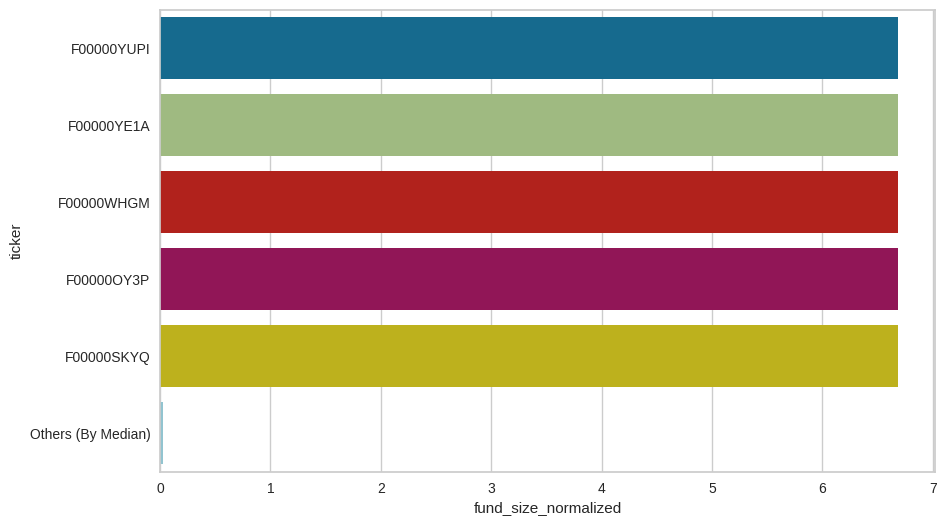

In [ ]:
df_top5 = df_big_five.head(5)
df_non_top5 = df_big_five.iloc[5:]
non_top5_data = {'ticker':'Others (By Median)', 'fund_size': df_non_top5["fund_size"].median()}
df_top5 = pd.concat([df_top5, pd.DataFrame([non_top5_data])], ignore_index=True)
df_top5['fund_size_normalized'] = df_top5['fund_size'] / 1e10

plt.figure(figsize=(10, 6))
plt.yticks(size=10)
plt.xticks(size=10)
sns.barplot(y='ticker', x='fund_size_normalized', data=df_top5)

Based on the sorted values of `fund_size`, it can be observed that there are several tickers that dominate the financial size of investment managers, namely:
1. F00000YUPI
2. F00000YE1A
3. F00000WHGM
4. F00000OY3P
5. F00000SKYQ

Furthermore, based on visualization and for the same reasons as before, we also found that the median of the data outside the top 5 significantly differs in value compared to the magnitudes of the top 5 investment manager data based on `fund_size`.

<Axes: xlabel='count', ylabel='category'>

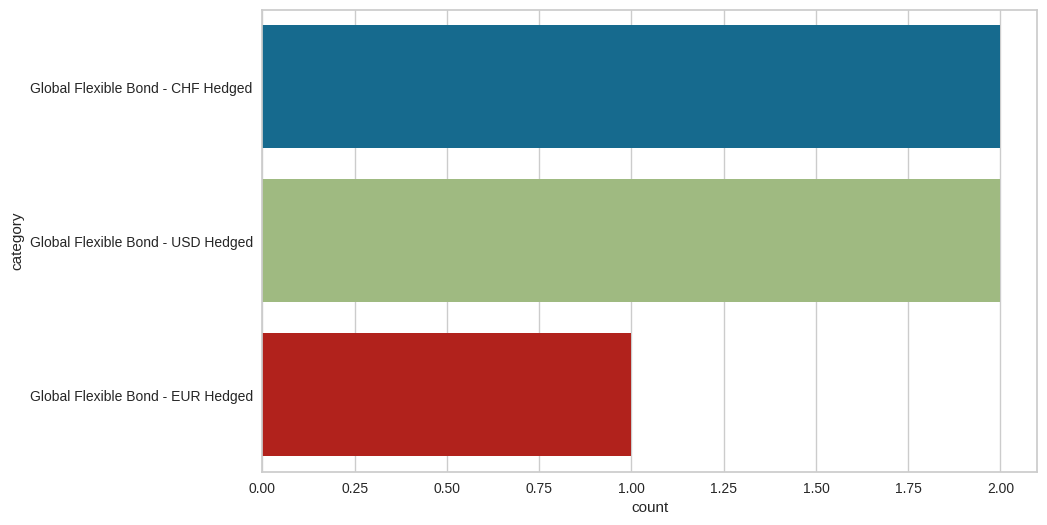

In [ ]:
df_big_five['category'] = pd.DataFrame(df['category'])
df_top5_category = df_big_five.head(5)
non_top5_data = {'ticker':'Others (By Median)', 'fund_size': df_non_top5["fund_size"].median()}
df_top5_category = pd.concat([df_top5_category, pd.DataFrame([non_top5_data])], ignore_index=True)
df_top5_category_groupby = df_top5_category.groupby(['category'])['category'].count().reset_index(name='count').sort_values(by='count', ascending=False)
df_top5_category_groupby

plt.figure(figsize=(10, 6))
plt.yticks(size=10)
plt.xticks(size=10)
sns.barplot(y='category', x='count', data=df_top5_category_groupby)

Furthermore, we also discovered an interesting insight where, of the top five fund_size managers, they all originate from the same category, namely **Global Flexible Bond**. Within this category, three countries stand out:
1. United States - USD
2. Switzerland - CHF
3. Combined countries in Europe - EUR

Therefore, we can conclude that Global Flexible Bond investment managers constitute the category with the largest `fund_size`.

### 📍 Perbandingan untuk tiap sektor (sector_*)

df_sector will contain a dataframe of portfolio percentages in a particular sector

In [ ]:
df_sector = df.filter(like='sector_')
df_sector.head()

,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services,sector_energy,sector_industrials,sector_technology
0,14.17,2.35,18.69,2.92,4.31,9.30,3.07,9.28,7.74,23.95,10.21
1,8.17,14.42,18.82,2.92,2.96,15.34,1.59,8.95,3.01,17.32,21.39
2,6.35,22.32,10.82,0.44,11.74,3.37,3.07,17.14,3.01,4.39,23.42
3,3.01,14.47,13.86,1.73,11.37,10.43,1.39,8.46,3.27,16.32,15.68
4,19.94,2.45,16.94,1.21,2.83,16.24,4.00,9.42,0.96,15.72,10.28


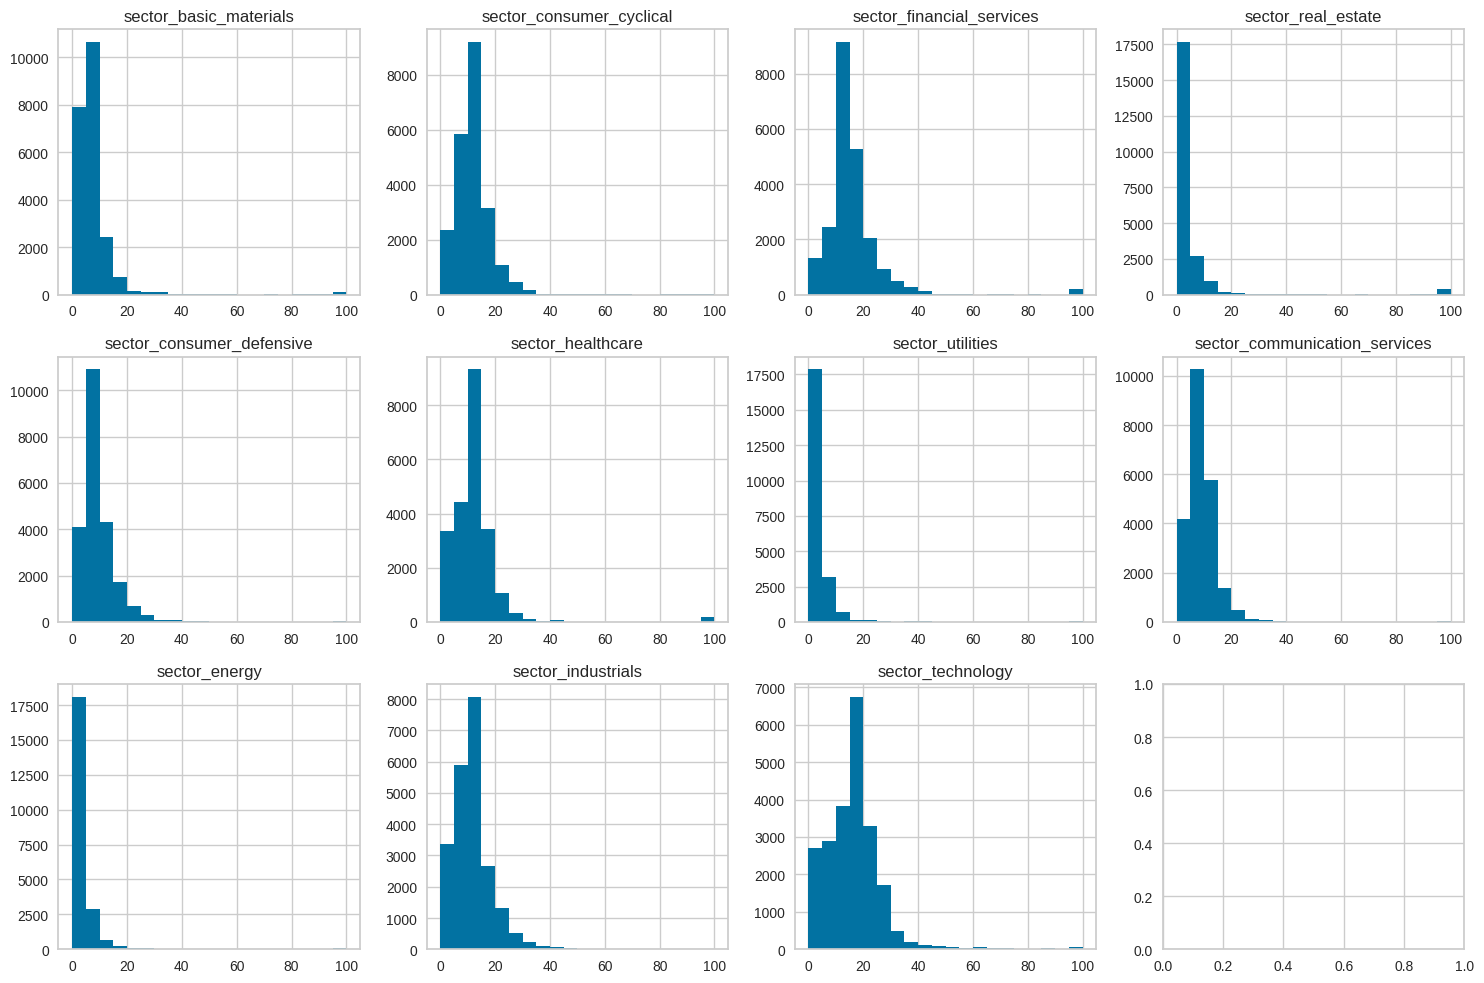

In [ ]:
num_sectors = len(df_sector.columns)
num_rows = 3
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for index, sector in enumerate(df_sector.columns):
    plt.sca(axes[index])
    plt.hist(df[sector], bins=20, range=[0, 100])
    plt.title(sector)

plt.tight_layout()
plt.show()

We can also finding a insight by finding the average sector composition of portfolios

In [ ]:
sector_means = {}
for sector in df_sector.columns:
  sector_means[sector] = df_sector[sector].mean()

We will rank sectors based on their average composition

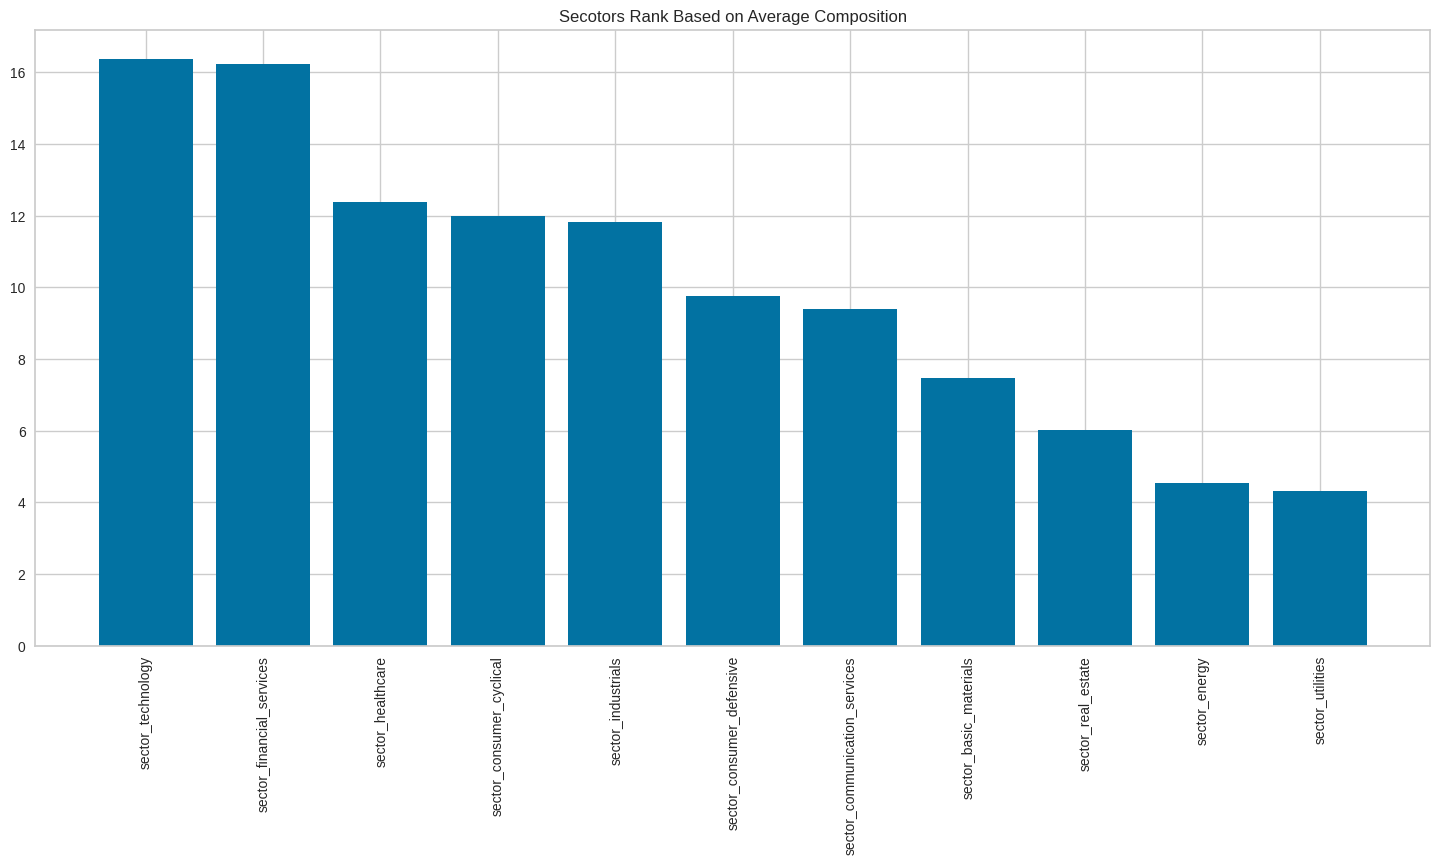

In [ ]:
df_secmeans = pd.DataFrame(sector_means.values(), index=sector_means.keys(), columns=["Percentage"])
df_secmeans = df_secmeans.sort_values("Percentage", ascending=False)

plt.figure(figsize=(18, 8))
plt.bar(x=df_secmeans.index, height=df_secmeans["Percentage"])
plt.xticks(rotation=90)
plt.title('Secotors Rank Based on Average Composition')
plt.show()

Through visualization, it's evident that the differences lies in the  dominance from technology sector, standing out with a high average composition. Following closely by financial services holding on a significant positions. In the middle tier, we find the healtcare, consumer cyclical, industrials, and consumer defensive sectors, while communication services, basic materials, real estate, energy, and utilities occupy lower positions, playing somewhat smaller roles.

### 📍 Hubungan antara management_fees dengan pertumbuhan return investasi

In [ ]:
returns_columns = df.filter(like='fund_return_')
merged_columns = pd.merge(df['management_fees'], returns_columns, left_index=True, right_index=True)
merged_columns.head()

,management_fees,fund_return_2019,fund_return_2018,fund_return_2017,fund_return_2016,fund_return_2015,fund_return_2020_q3,fund_return_2020_q2,fund_return_2020_q1,fund_return_2019_q4,...,fund_return_2017_q2,fund_return_2017_q1,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1
0,0.75,18.51,-11.31,15.24,28.74,2.81,5.66,18.05,-24.50,2.42,...,1.95,7.25,6.06,14.75,1.85,3.86,8.01,-8.18,-4.63,7.11
1,0.75,25.39,-5.72,1.74,41.98,7.12,0.89,17.82,-24.09,0.12,...,-1.71,0.12,11.94,8.64,9.40,6.72,9.26,-6.20,-4.92,9.93
2,0.75,22.29,-19.51,29.12,24.70,-5.99,17.13,27.23,-9.07,6.64,...,6.43,9.50,-2.93,12.53,6.06,7.64,7.34,-10.01,-10.82,9.13
3,0.30,23.37,-6.10,6.13,38.64,-0.80,4.01,16.15,-22.56,0.69,...,-2.51,2.40,12.26,8.15,8.10,5.64,7.76,-5.85,-7.07,5.21
4,0.85,20.20,-13.60,12.87,22.06,2.81,1.36,27.48,-27.51,3.33,...,1.51,5.06,2.79,8.77,6.60,1.89,6.03,-5.38,-4.41,7.11


In [ ]:
shape_overview(merged_columns)

The DataFrame has 22420 rows and 29 columns.


Looks for a correlation between `management_fees` and investment return growth

In [ ]:
correlation_data = {}
for col in returns_columns:
    correlation = merged_columns['management_fees'].corr(merged_columns[col], method='pearson')
    correlation_data[col] = correlation

Shows data based on a range of years

In [ ]:
for year in range(2015, 2021):
    yearly_corr = {key: val for key, val in correlation_data.items() if str(year) in key}
    print(f"Correlation for year {year}:")

    for key, value in yearly_corr.items():
        print(f"- {key}\t: {value}")

    print("\n")

Correlation for year 2015:
- fund_return_2015	: -0.07106042242513959
- fund_return_2015_q4	: -0.05230124374023938
- fund_return_2015_q3	: -0.08550262161686985
- fund_return_2015_q2	: 0.04553068779006421
- fund_return_2015_q1	: -0.028159000213548033


Correlation for year 2016:
- fund_return_2016	: 0.004629662141481772
- fund_return_2016_q4	: -0.0898933268870834
- fund_return_2016_q3	: 0.02499981475213087
- fund_return_2016_q2	: 0.033412129651314515
- fund_return_2016_q1	: 0.029168451799411323


Correlation for year 2017:
- fund_return_2017	: 0.03223355167605457
- fund_return_2017_q4	: -0.044537834577223594
- fund_return_2017_q3	: 0.050029133973647166
- fund_return_2017_q2	: -0.002950228075482052
- fund_return_2017_q1	: 0.062208063460823186


Correlation for year 2018:
- fund_return_2018	: -0.08058372161716712
- fund_return_2018_q4	: 0.03289151335523258
- fund_return_2018_q3	: -0.09369526833713908
- fund_return_2018_q2	: -0.09237906019499915
- fund_return_2018_q1	: 0.05901304382286242



Find the highest and lowest values ​​for the data correlation range

In [ ]:
max_corr_col, min_corr_col = max(yearly_corr, key=yearly_corr.get), min(yearly_corr, key=yearly_corr.get)
max_corr_value, min_corr_value = yearly_corr[max_corr_col], yearly_corr[min_corr_col]
print(f"\nRange of Lowest to Highest Correlation Overall: {min_corr_value} - {max_corr_value}")


Range of Lowest to Highest Correlation Overall: -0.03293476009134241 - 0.07237324326481914


From the data analysis using the Pearson method, we found that the correlation range between 'management_fees' and the investment return growth obtained from the 'fund_return_' column across the entire dataset ranges from -0.0336 to 0.073. This range represents the lowest and highest correlation values found between 'management_fees' and 'fund_return_' from 2015 to 2020 quarter 3.

Based on these correlation results, we can conclude that the relationship between 'management_fees' and investment return growth is almost non-existent, as indicated by correlation values approaching 0. This explains that 'management_fees' and investment return growth do not have a significant correlation.

### 📍 Identifikasi perbedaan antar equity_style

In [ ]:
eqstyle_cols = [
    "holdings_n_stock",
    "management_fees",
    "fund_size",
    "fund_trailing_return_3years",
    "fund_trailing_return_10years",
    "quarters_up",
    "quarters_down",
    "rating"
]

eqstyle = df.filter(like="equity_style")
earnings_growth = df.filter(like="earnings_growth")
df_sectors = df.filter(like="sector_")
merged_df = pd.concat([eqstyle, earnings_growth, df_sectors, df.loc[:, eqstyle_cols]], axis=1)

In [ ]:
merged_df.iloc[:, 0:11]

,equity_style,long_term_projected_earnings_growth,historical_earnings_growth,sector_basic_materials,sector_consumer_cyclical,sector_financial_services,sector_real_estate,sector_consumer_defensive,sector_healthcare,sector_utilities,sector_communication_services
0,Value,8.66,3.06,14.17,2.35,18.69,2.92,4.31,9.30,3.07,9.28
1,Blend,9.34,14.30,8.17,14.42,18.82,2.92,2.96,15.34,1.59,8.95
2,Growth,16.87,4.01,6.35,22.32,10.82,0.44,11.74,3.37,3.07,17.14
3,Value,7.77,3.17,3.01,14.47,13.86,1.73,11.37,10.43,1.39,8.46
4,Growth,10.02,-14.02,19.94,2.45,16.94,1.21,2.83,16.24,4.00,9.42
...,...,...,...,...,...,...,...,...,...,...,...
22415,Growth,40.12,6.16,3.30,19.93,16.27,0.62,3.03,11.56,0.77,8.68
22416,Value,5.04,-4.06,17.64,7.35,26.02,1.00,9.48,7.32,4.14,5.98
22417,Blend,9.16,6.27,3.66,14.73,22.92,0.82,2.71,12.69,3.07,16.78
22418,Growth,45.55,-4.32,8.70,7.94,11.46,2.43,4.89,12.42,3.07,5.02


In [ ]:
merged_df.iloc[:, 11:]

,sector_energy,sector_industrials,sector_technology,holdings_n_stock,management_fees,fund_size,fund_trailing_return_3years,fund_trailing_return_10years,quarters_up,quarters_down,rating
0,7.74,23.95,10.21,45.0,0.75,584392690.0,2.08,7.17,16,6,3.0
1,3.01,17.32,21.39,57.0,0.75,771790000.0,6.66,7.17,16,7,3.0
2,3.01,4.39,23.42,40.0,0.75,157784400.0,13.19,7.76,16,7,4.0
3,3.27,16.32,15.68,1106.0,0.30,297460000.0,7.43,12.49,17,6,2.0
4,0.96,15.72,10.28,47.0,0.85,20116000.0,2.22,7.17,8,4,2.0
...,...,...,...,...,...,...,...,...,...,...,...
22415,3.49,21.23,11.11,86.0,1.50,233011200.0,7.60,12.42,18,5,4.0
22416,8.44,11.84,0.79,66.0,0.75,70306800.0,-5.74,7.17,14,9,2.0
22417,0.37,11.07,14.24,148.0,0.00,745220000.0,8.40,7.17,18,5,3.0
22418,6.25,12.01,28.89,133.0,1.00,236369100.0,10.91,7.17,17,6,4.0


In [ ]:
eqstyle_earnings = merged_df.loc[:, ["equity_style", "long_term_projected_earnings_growth", "historical_earnings_growth"]]
eqstyle_earnings.head()

,equity_style,long_term_projected_earnings_growth,historical_earnings_growth
0,Value,8.66,3.06
1,Blend,9.34,14.30
2,Growth,16.87,4.01
3,Value,7.77,3.17
4,Growth,10.02,-14.02


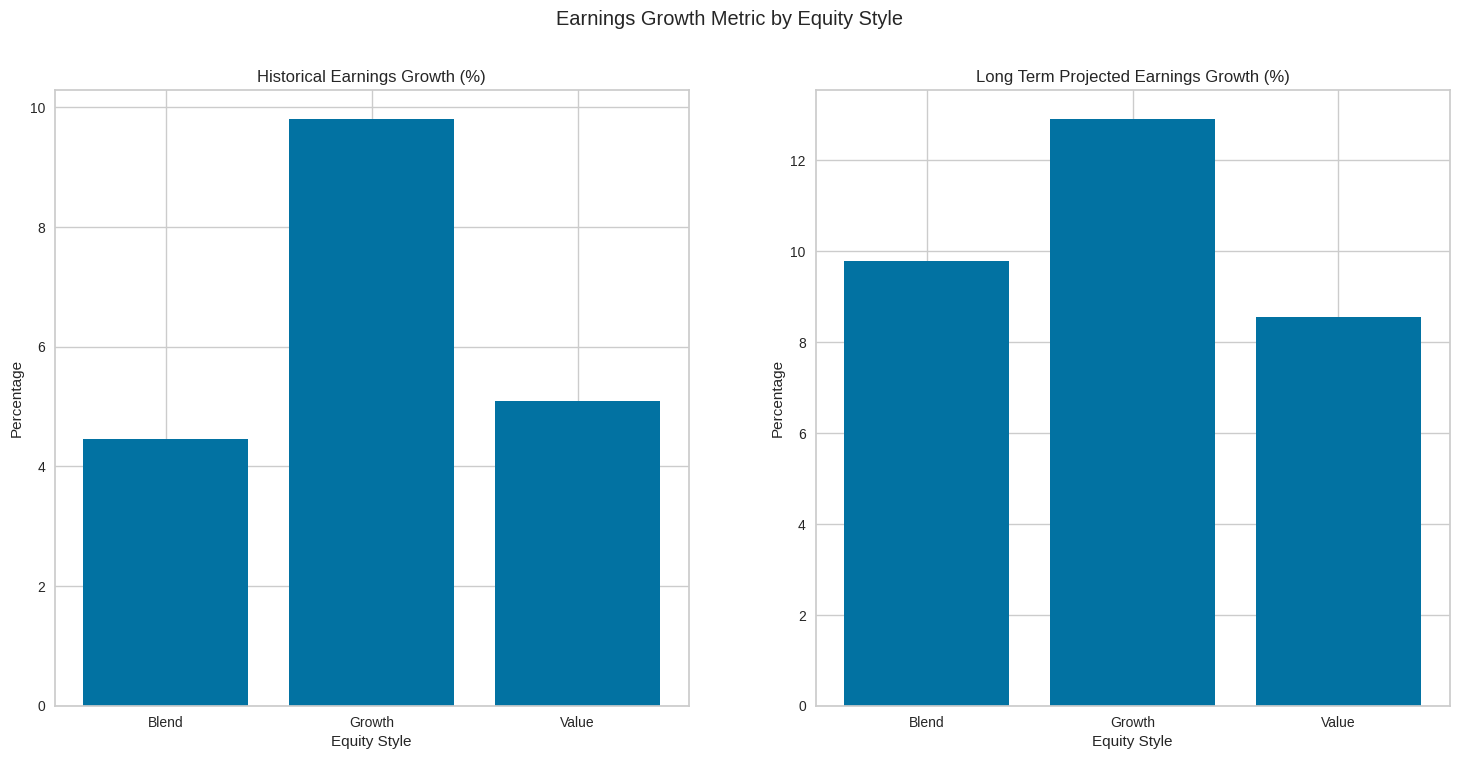

In [ ]:
avg_lt_earnings_by_style = eqstyle_earnings.groupby("equity_style").mean()
X = ["Blend", "Growth", "Value"]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
fig.suptitle("Earnings Growth Metric by Equity Style")

ax1.bar(X, avg_lt_earnings_by_style['historical_earnings_growth'])
ax1.set_title("Historical Earnings Growth (%)")
ax1.set(xlabel='Equity Style', ylabel='Percentage')

ax2.bar(X, avg_lt_earnings_by_style['long_term_projected_earnings_growth'])
ax2.set_title("Long Term Projected Earnings Growth (%)")
ax2.set(xlabel='Equity Style', ylabel='Percentage')

plt.show()

**Analisis**

Based on the two bar charts above, it can be observed that investment managers with a Growth style exhibit the highest historical as well as long-term projected earnings growth. As for the analysis we can provide regarding the differences between the two:

- Historical Earnings Growth:
> The Growth investment style surpasses both Blend and Value in historical earnings growth. This implies a track record of consistently high earnings growth in the past.

- Long Term Projected Earnings Growth:
> Similarly, in the context of long-term projected earnings growth, the Growth style maintains its lead, indicating that investment managers expect continued strong growth in the future.

This suggests that the Growth investment style is associated with a historical pattern of high earnings growth and a positive outlook for future earnings. Investors considering these charts may find the Growth style appealing for its consistent growth performance over time.


### 📍 Identifikasi 3 besar Negara berdasarkan Market Capital

On this step, we have tried to calculate the country with highest market capital based on the given `equity_size`. All of our calculation is from the category, which we did process the representation of investment management country. For the currency part, we convert it to the country name.

In [ ]:
avg_roa = df['roa'].mean()
avg_roe = df['roe'].mean()
avg_roic = df['roic'].mean()
print("Average ROA:", avg_roa)
print("Average ROE:", avg_roe)
print("Average ROIC:", avg_roic)

Average ROA: 6.03114897413024
Average ROE: 16.108566904549512
Average ROIC: 10.423108831400533


In [ ]:
max_roa_company = df.loc[df['roa'].idxmax()]
min_roe_company = df.loc[df['roe'].idxmin()]
max_roic_company = df.loc[df['roic'].idxmax()]
print("\nCompany with the highest ROA:\n", max_roa_company)
print("\nCompany with the lowest ROE:\n", min_roe_company)
print("\nCompany with the highest ROIC:\n", max_roic_company)


Company with the highest ROA:
 ticker                                F0GBR04IW0
category               US Large-Cap Blend Equity
equity_style                              Growth
equity_size                                Large
equity_size_score                         288.67
                                 ...            
fund_return_2015_q2                         -6.3
fund_return_2015_q1                         7.14
quarters_up                                   17
quarters_down                                  6
rating                                       4.0
Name: 305, Length: 99, dtype: object

Company with the lowest ROE:
 ticker                        F00000WPFM
category               USD Flexible Bond
equity_style                       Value
equity_size                        Small
equity_size_score                   9.72
                             ...        
fund_return_2015_q2                -4.41
fund_return_2015_q1                 7.11
quarters_up                      

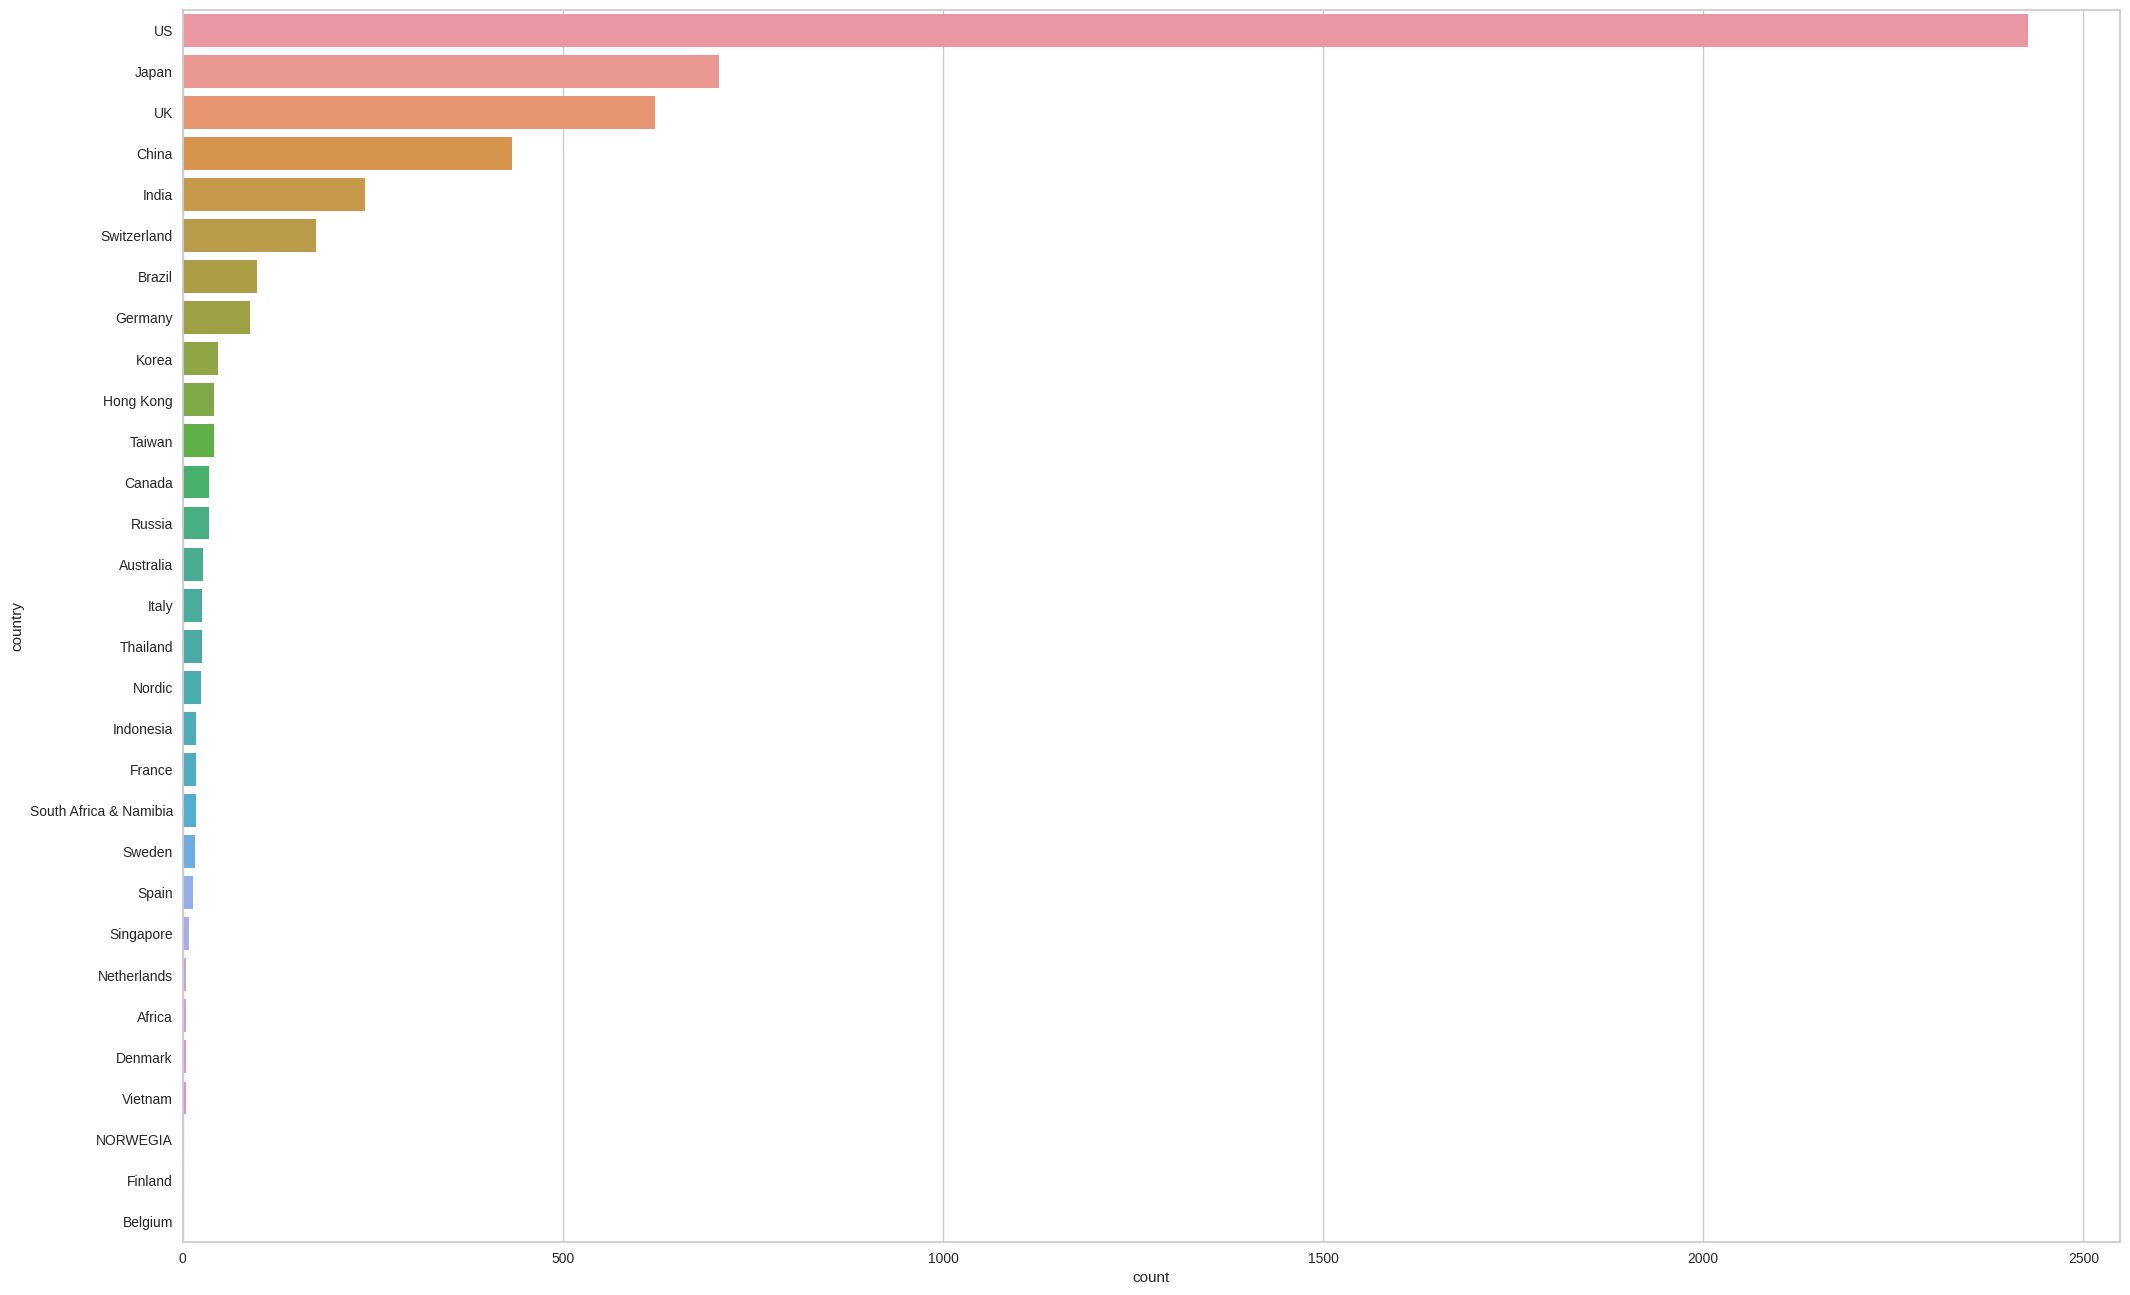

In [ ]:
keywords_to_exclude = ['global', 'pacific', 'eur', 'sector', 'gbp', 'asia', 'property', 'america', 'asean', 'target', 'other', 'bric', 'alt']
unique_values = set()

for x in df['category']:
    if not any(keyword in x.lower() for keyword in keywords_to_exclude):
        unique_values.add(x)

new_df = df[df['category'].isin(unique_values)].copy()
filtered_df = new_df[new_df['equity_size'] == 'Large'].copy()
filtered_df['country'] = filtered_df['category'].str.split().str[0]
filtered_df.loc[filtered_df['country'].isin(['USD']), 'country'] = 'US'
filtered_df.loc[filtered_df['country'].isin(['CHF']), 'country'] = 'Switzerland'
filtered_df.loc[filtered_df['country'].isin(['Greater']), 'country'] = 'China'
filtered_df.loc[filtered_df['country'].isin(['SEK']), 'country'] = 'Sweden'

filtered_df['country'] = filtered_df['country'].replace('South', 'South Africa & Namibia')
filtered_df['country'] = filtered_df['country'].replace('Hong', 'Hong Kong')
filtered_df.loc[filtered_df['country'].isin(['NOK']), 'country'] = 'NORWEGIA'

result = filtered_df.groupby('country')['equity_size'].count().reset_index().rename(columns={'equity_size': 'count'})
result = result.loc[result['country'] != 'Large']
result = result.loc[result['country'] != 'World']
result = result.sort_values(ascending=False, by='count')

plt.figure(figsize=(25, 16))
plt.yticks(size=10)
plt.xticks(size=10)
sns.barplot(y='country', x='count', data=result)
plt.show()

Through this visualization, it can be seen that the US, Japan and UK are the top three countries that have the largest market capital compared to other countries.

### 📍 Identifikasi relasi antara komposisi sektor teknologi dengan fund size

In [ ]:
df_tech_fundsize_return = df[["sector_technology", "fund_size", "fund_trailing_return_ytd", "fund_trailing_return_3years", "fund_trailing_return_10years"]]
df_tech_fundsize_return.head()

,sector_technology,fund_size,fund_trailing_return_ytd,fund_trailing_return_3years,fund_trailing_return_10years
0,10.21,584392690.0,1.40,2.08,7.17
1,21.39,771790000.0,1.65,6.66,7.17
2,23.42,157784400.0,45.43,13.19,7.76
3,15.68,297460000.0,3.61,7.43,12.49
4,10.28,20116000.0,-1.86,2.22,7.17


Visualizing the relationship between technology sector portfolios and fund size (all in USD)

In [ ]:
df_tech_fundsize_return[df_tech_fundsize_return["fund_size"] > 1e10]

,sector_technology,fund_size,fund_trailing_return_ytd,fund_trailing_return_3years,fund_trailing_return_10years
21,17.11,2.316586e+10,17.44,14.85,18.72
244,24.70,2.744240e+10,12.68,12.99,7.17
278,19.65,1.017599e+10,21.67,13.53,12.92
395,19.43,1.257479e+10,9.98,9.72,7.17
412,28.90,1.837377e+10,47.20,24.26,7.17
...,...,...,...,...,...
21713,24.20,1.092185e+10,13.09,13.36,7.17
21757,20.65,1.086870e+10,12.31,10.46,12.52
21802,19.44,2.732452e+10,8.55,9.30,11.77
21990,15.86,1.519823e+10,1.82,3.27,7.52


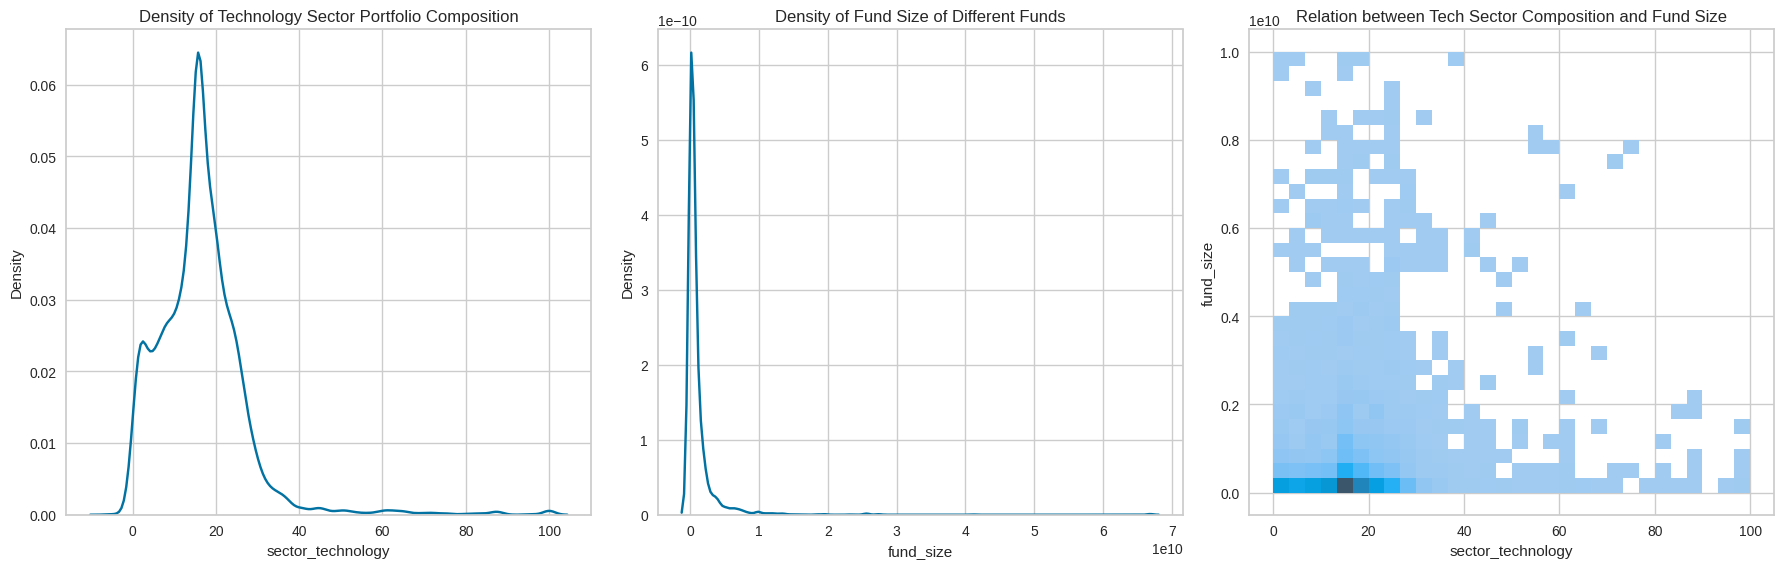

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.kdeplot(data=df_tech_fundsize_return, x="sector_technology", ax=axes[0])
axes[0].set_title("Density of Technology Sector Portfolio Composition")

sns.kdeplot(data=df_tech_fundsize_return, x="fund_size", ax=axes[1])
axes[1].set_title("Density of Fund Size of Different Funds")

sns.histplot(data=df_tech_fundsize_return, x="sector_technology", y="fund_size", bins=30, binrange=((0, 100), (0, 10e9)), ax=axes[2])
axes[2].set_title("Relation between Tech Sector Composition and Fund Size")

plt.tight_layout()
plt.show()

By using the same dataset slicing results as above, our group can define the relationship between *technology sector* and *fund return*, divided into 3, namely:

- Fund return year-to-date: Fund return from the beginning of the year to the data snapshot date
- Fund return 3 years: Fund return for the past 3 years
- Fund return 10 years: Fund return for the past 10 years

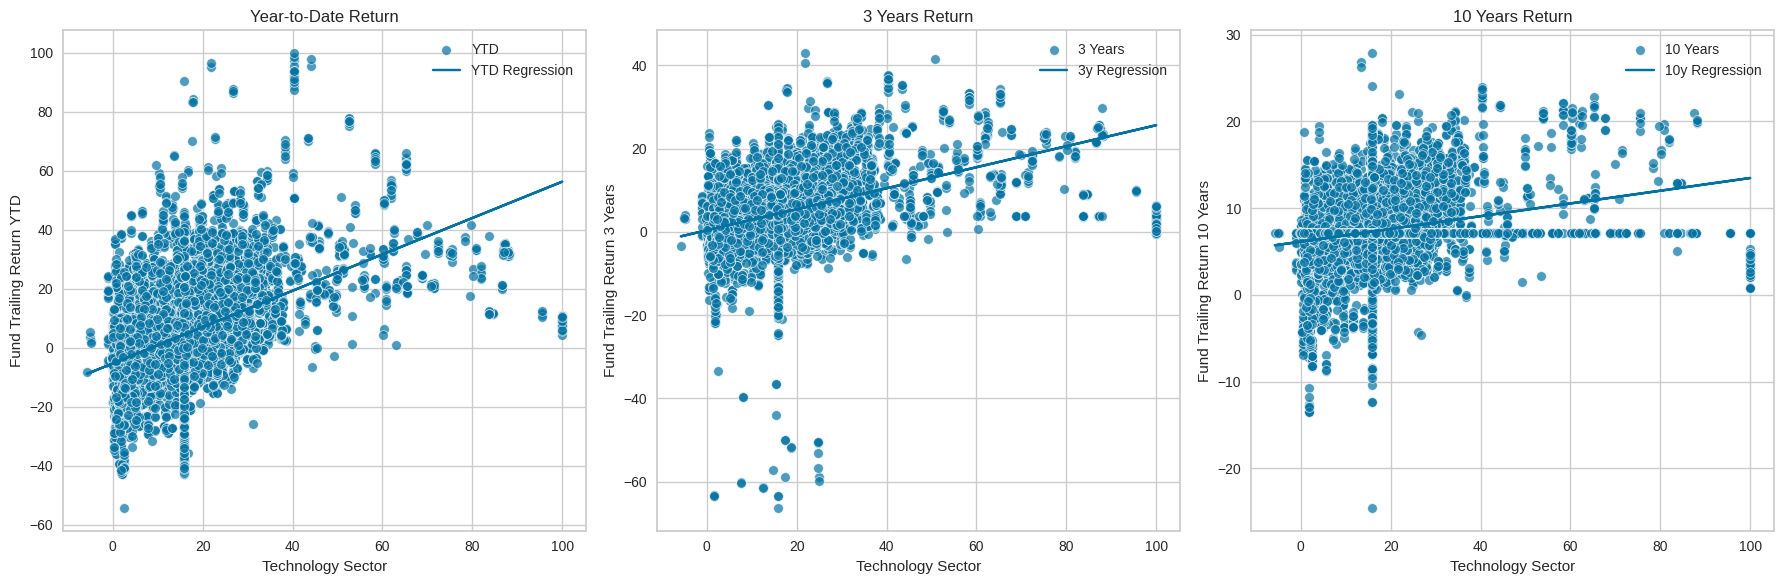

In [ ]:
technology_sector = df_tech_fundsize_return["sector_technology"]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatterplot and Linear Regression for Year-to-Date (YTD)
ytd_return = df_tech_fundsize_return["fund_trailing_return_ytd"]
sns.scatterplot(x=technology_sector, y=ytd_return, alpha=0.7, label="YTD", ax=axes[0])
b_ytd, m_ytd = np.polyfit(technology_sector, ytd_return, 1)
axes[0].plot(technology_sector, np.poly1d(np.polyfit(technology_sector, ytd_return, 1))(technology_sector), '-', label="YTD Regression")
axes[0].set_title("Year-to-Date Return")
axes[0].set_xlabel("Technology Sector")
axes[0].set_ylabel("Fund Trailing Return YTD")
axes[0].legend()

# Scatterplot and Linear Regression for 3 Years
return_3years = df_tech_fundsize_return["fund_trailing_return_3years"]
sns.scatterplot(x=technology_sector, y=return_3years, alpha=0.7, label="3 Years", ax=axes[1])
b_3years, m_3years = np.polyfit(technology_sector, return_3years, 1)
axes[1].plot(technology_sector, np.poly1d(np.polyfit(technology_sector, return_3years, 1))(technology_sector), '-', label="3y Regression")
axes[1].set_title("3 Years Return")
axes[1].set_xlabel("Technology Sector")
axes[1].set_ylabel("Fund Trailing Return 3 Years")
axes[1].legend()

# Scatterplot and Linear Regression for 10 Years
return_10years = df_tech_fundsize_return["fund_trailing_return_10years"]
sns.scatterplot(x=technology_sector, y=return_10years, alpha=0.7, label="10 Years", ax=axes[2])
b_10years, m_10years = np.polyfit(technology_sector, return_10years, 1)
axes[2].plot(technology_sector, np.poly1d(np.polyfit(technology_sector, return_10years, 1))(technology_sector), '-', label="10y Regression")
axes[2].set_title("10 Years Return")
axes[2].set_xlabel("Technology Sector")
axes[2].set_ylabel("Fund Trailing Return 10 Years")
axes[2].legend()

plt.tight_layout()
plt.show()


The third graph of fund returns based on time has several differences for the technology sector.

An increase in fund duration will result in a lower variation of fund returns. During the YTD period, it can be seen that the range of long-term fund returns is from -60% to almost 100%, and the linear regression graph appears steeper.

Meanwhile, during the 10-year period, the range of long-term fund returns is from -25% to 30% with a flatter regression line.

In technology investments, the higher the composition of technology assets in the portfolio will cause higher fund returns, especially in longer timeframes. However, in the short term, returns from portfolios that are heavily weighted in technology (>60%) are lower compared to portfolios with moderate technology asset compositions (30-40%).

This phenomenon is in line with the characteristics of the technology sector as a sector that tends to have high risk and high return, so the variation of returns obtained for the short term will be higher compared to investments in conservative sectors such as energy or utilities.


## 🤖 Modeling

### 📍 Mengklasifikasi "rating"

In [ ]:
tmp = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
CATEGORICAL_FEATURES = [
    'category', 'equity_style', 'equity_size',
    'sustainability_rank', 'bond_credit_quality',
]

RESERVED = ["ticker", "rating"]

CONTINUOUS_FEATURES = [ col for col in df.columns if col not in CATEGORICAL_FEATURES and col not in RESERVED]

print("CATEGORICAL COLUMNS:", len(CATEGORICAL_FEATURES))
print("NUMERICAL COLUMNS:", len(CONTINUOUS_FEATURES))

CATEGORICAL COLUMNS: 5
NUMERICAL COLUMNS: 92


In [ ]:
X = df.copy().drop("rating", axis=1)
y = df['rating']

#### 🛠️ Filter Categorical Features

In [ ]:
X_cat = df[CATEGORICAL_FEATURES].copy()

In [ ]:
le = LabelEncoder()

for col in CATEGORICAL_FEATURES:
  X_cat[col] = le.fit_transform(X_cat[col])

X_cat.head()

,category,equity_style,equity_size,sustainability_rank,bond_credit_quality
0,92,2,0,0,1
1,186,0,1,1,1
2,9,1,0,3,1
3,183,2,0,1,1
4,53,1,1,1,1


#### 🛠️ Filter Numerical Features

In [ ]:
START = -10
END = 0

# Display first 10 columns of continuous features, with templates to copy for column 10-end
START += 10
END += 10
df[CONTINUOUS_FEATURES].iloc[:, START:END]

,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,long_term_projected_earnings_growth,historical_earnings_growth,sales_growth,cash_flow_growth
0,248.25,10.66,1.00,0.92,6.19,4.13,8.66,3.06,4.72,0.16
1,124.69,23.06,1.97,1.70,12.07,1.30,9.34,14.30,7.55,8.56
2,322.70,27.99,3.04,2.71,10.35,0.97,16.87,4.01,13.80,21.53
3,229.67,17.19,1.77,0.75,6.52,2.73,7.77,3.17,3.04,-0.32
4,111.36,12.15,1.01,0.62,3.54,2.86,10.02,-14.02,-16.23,-6.55
...,...,...,...,...,...,...,...,...,...,...
22415,34.41,19.31,1.60,0.94,4.75,3.66,40.12,6.16,1.17,9.67
22416,147.61,9.63,0.90,0.46,3.72,7.97,5.04,-4.06,1.00,18.09
22417,280.58,23.77,1.92,1.54,9.76,2.16,9.16,6.27,3.85,7.85
22418,-125.83,12.71,1.60,1.01,5.41,1.41,45.55,-4.32,-18.07,7.17


In [ ]:
X_cont = df[CONTINUOUS_FEATURES]
X_cont.head()

,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,dividend_yield_factor,long_term_projected_earnings_growth,historical_earnings_growth,sales_growth,cash_flow_growth,...,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down
0,248.25,10.66,1.00,0.92,6.19,4.13,8.66,3.06,4.72,0.16,...,6.06,14.75,1.85,3.86,8.01,-8.18,-4.63,7.11,16,6
1,124.69,23.06,1.97,1.70,12.07,1.30,9.34,14.30,7.55,8.56,...,11.94,8.64,9.40,6.72,9.26,-6.20,-4.92,9.93,16,7
2,322.70,27.99,3.04,2.71,10.35,0.97,16.87,4.01,13.80,21.53,...,-2.93,12.53,6.06,7.64,7.34,-10.01,-10.82,9.13,16,7
3,229.67,17.19,1.77,0.75,6.52,2.73,7.77,3.17,3.04,-0.32,...,12.26,8.15,8.10,5.64,7.76,-5.85,-7.07,5.21,17,6
4,111.36,12.15,1.01,0.62,3.54,2.86,10.02,-14.02,-16.23,-6.55,...,2.79,8.77,6.60,1.89,6.03,-5.38,-4.41,7.11,8,4


In [ ]:
frames = [X_cat, X_cont]
X = pd.concat(frames, axis=1)
X.head()

,category,equity_style,equity_size,sustainability_rank,bond_credit_quality,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,...,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down
0,92,2,0,0,1,248.25,10.66,1.00,0.92,6.19,...,6.06,14.75,1.85,3.86,8.01,-8.18,-4.63,7.11,16,6
1,186,0,1,1,1,124.69,23.06,1.97,1.70,12.07,...,11.94,8.64,9.40,6.72,9.26,-6.20,-4.92,9.93,16,7
2,9,1,0,3,1,322.70,27.99,3.04,2.71,10.35,...,-2.93,12.53,6.06,7.64,7.34,-10.01,-10.82,9.13,16,7
3,183,2,0,1,1,229.67,17.19,1.77,0.75,6.52,...,12.26,8.15,8.10,5.64,7.76,-5.85,-7.07,5.21,17,6
4,53,1,1,1,1,111.36,12.15,1.01,0.62,3.54,...,2.79,8.77,6.60,1.89,6.03,-5.38,-4.41,7.11,8,4


#### 🛠️ Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,category,equity_style,equity_size,sustainability_rank,bond_credit_quality,equity_size_score,price_prospective_earnings,price_book_ratio,price_sales_ratio,price_cash_flow_ratio,...,fund_return_2016_q4,fund_return_2016_q3,fund_return_2016_q2,fund_return_2016_q1,fund_return_2015_q4,fund_return_2015_q3,fund_return_2015_q2,fund_return_2015_q1,quarters_up,quarters_down
2414,6,0,0,3,1,363.76,17.50,1.73,1.88,4.87,...,-0.97,16.11,10.19,3.57,8.09,-13.49,-7.53,13.09,16,7
2794,185,2,0,2,1,221.12,13.76,1.36,0.50,7.07,...,14.49,8.89,8.87,3.48,7.02,-2.93,-6.25,3.88,14,9
11427,122,1,0,2,1,227.30,27.54,4.01,2.53,14.86,...,4.96,5.03,9.26,0.53,3.04,1.55,-6.88,7.75,15,8
5207,65,0,0,2,1,251.57,15.60,1.65,1.27,9.09,...,0.67,7.40,-1.37,-0.41,5.87,-9.21,-0.69,4.63,16,7
592,183,0,0,2,1,282.11,16.88,4.41,2.18,11.15,...,10.16,9.52,6.60,1.89,6.03,-5.38,-4.41,7.11,13,4


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

#### 🛠️ Feature Selection using MI

In [ ]:
# Mutual Information Classifier
mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns

mi.sort_values(ascending=False)

equity_size_score      0.632040
fund_size              0.526930
market_cap_medium      0.513350
market_cap_giant       0.507457
market_cap_large       0.492607
                         ...   
sustainability_rank    0.034368
quarters_up            0.030144
involvement_gmo        0.025087
bond_credit_quality    0.006460
equity_size            0.004054
Length: 97, dtype: float64

In [ ]:
# Determine column percentage
PCT = 20

PCT = PCT / 100
PCT

0.2

In [ ]:
KBEST = math.ceil(PCT * len(mi.index))
KBEST

20

In [ ]:
skbest = SelectKBest(mutual_info_classif, k=KBEST)
skbest.fit(X_train, y_train)

SelectKBest(k=20, score_func=<function mutual_info_classif at 0x795442a372e0>)

In [ ]:
top_cols_value = X.columns[skbest.get_support()]
X_train, X_test = X_train[top_cols_value], X_test[top_cols_value]
X_train.head()

,equity_size_score,price_prospective_earnings,price_cash_flow_ratio,historical_earnings_growth,sales_growth,cash_flow_growth,book_value_growth,roe,sector_consumer_cyclical,sector_financial_services,sector_consumer_defensive,sector_healthcare,sector_communication_services,sector_industrials,sector_technology,market_cap_giant,market_cap_large,market_cap_medium,involvement_animal_testing,fund_size
2414,363.76,17.50,4.87,-4.20,9.77,-0.05,11.40,13.11,14.23,13.90,5.05,7.52,24.38,3.26,28.13,63.29,21.89,14.13,8.28,690980000.0
2794,221.12,13.76,7.07,18.62,8.07,6.98,4.45,12.45,4.48,21.90,2.65,25.38,9.35,10.33,14.78,22.47,36.48,32.54,17.58,121880000.0
11427,227.30,27.54,14.86,9.95,-9.60,5.31,5.88,13.61,15.06,14.32,0.86,28.59,10.79,14.09,8.30,30.03,30.03,40.08,17.98,311030000.0
5207,251.57,15.60,9.09,-1.23,2.30,10.02,5.33,15.52,11.94,14.11,8.79,8.68,8.21,11.92,15.23,35.11,30.62,27.20,11.88,74673300.0
592,282.11,16.88,11.15,6.07,6.90,11.75,6.82,33.69,4.88,7.25,15.86,15.12,8.11,20.83,22.53,39.55,43.67,14.39,26.40,76170000.0


In [ ]:
scaler = StandardScaler()
X_train_std, X_test_std = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

In [ ]:
X_train = X_train_std
X_test = X_test_std

In [ ]:
X_train

array([[ 1.56915795, -0.14012189, -0.90686371, ..., -0.57548935,
        -0.51077429, -0.13098362],
       [-0.37542494, -0.43304134, -0.46808794, ...,  0.62302126,
         0.20454834, -0.31250835],
       [-0.29117422,  0.64621803,  1.08557716, ...,  1.11388329,
         0.2353149 , -0.25217554],
       ...,
       [ 0.59563955,  0.38775969,  0.13423152, ..., -0.90685377,
         0.54913386, -0.19169919],
       [ 0.54410756,  0.1903915 ,  0.02254315, ..., -0.492811  ,
         0.35915032,  0.36360326],
       [ 1.59328801, -0.34453894, -0.01335669, ..., -1.10150596,
        -0.70306531, -0.16521846]])

In [ ]:
def classifier_metrics(scores):
    accuracy_mean = np.mean(scores['test_accuracy'])
    precision_mean = np.mean(scores['test_precision'])
    recall_mean = np.mean(scores['test_recall'])
    f1_mean = np.mean(scores['test_f1'])

    print('Accuracy\t:', accuracy_mean)
    print('Precision\t:', precision_mean)
    print('Recall\t\t:', recall_mean)
    print('F1 Score\t:', f1_mean)

In [ ]:
def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [ ]:
# Metrics function untuk menghitung skor klasifikasi
def classification_metrics(prediction, y_test):
  accuracy = accuracy_score(y_test, prediction)
  f1 = f1_score(y_test, prediction, average="macro")
  recall = recall_score(y_test, prediction, average="macro")
  precision = precision_score(y_test, prediction, average="macro")

  print('Accuracy: ' + str(accuracy))
  print('F1 Score: ' + str(f1))
  print('Recall Score: ' + str(recall))
  print('Precision Score: ' + str(precision))

#### 📌 Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
predicted = dt.predict(X_test)
classification_metrics(predicted, y_test)

Accuracy: 0.5834076717216771
F1 Score: 0.5727465962834151
Recall Score: 0.5768177565263574
Precision Score: 0.5704253893333048


#### 📌 Decision Tree with *Hyperparameter Tuning*

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [3, 5, 7],
    'max_depth' : [13, 17, 21]
}
CV=5

In [ ]:
dt = DecisionTreeClassifier()
clf = GridSearchCV(
    estimator=dt,
    param_grid=param_grid, cv=CV
)

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [13, 17, 21],
                         'min_samples_split': [3, 5, 7]})

In [ ]:
clf.best_params_

{'criterion': 'log_loss', 'max_depth': 21, 'min_samples_split': 3}

In [ ]:
dt = DecisionTreeClassifier(**clf.best_params_)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=21, min_samples_split=3)

In [ ]:
model = dt
predicted = model.predict(X_test)
classification_metrics(predicted, y_test)

Accuracy: 0.5929973238180196
F1 Score: 0.5765384621477876
Recall Score: 0.5794546901758924
Precision Score: 0.5754111386836931


#### 📌 Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model = rfc
predicted = model.predict(X_test)
classification_metrics(predicted, y_test)

Accuracy: 0.7192239072256913
F1 Score: 0.7199566067577123
Recall Score: 0.7118285380726391
Precision Score: 0.7295840368125169


#### 📌 Random Forest with *Hyperparameter Tuning*

In [ ]:
rfc = RandomForestClassifier()

RandomForestClassifier()

In [ ]:
param_grid = {
    'n_estimators': [50],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [3, 7, 12],
    'max_depth' : [15, 21, 25],
}

CV=5

In [ ]:
clf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=CV)

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 21, 25],
                         'min_samples_split': [3, 7, 12],
                         'n_estimators': [50]})

In [ ]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 21,
 'min_samples_split': 3,
 'n_estimators': 50}

In [ ]:
bp = clf.best_params_
bp["n_estimators"] = 150
bp

{'criterion': 'entropy',
 'max_depth': 21,
 'min_samples_split': 3,
 'n_estimators': 150}

In [ ]:
rfc_ft = RandomForestClassifier(**clf.best_params_)
rfc_ft.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=21, min_samples_split=3,
                       n_estimators=150)

In [ ]:
model = rfc_ft
predicted = model.predict(X_test)
classification_metrics(predicted, y_test)

Accuracy: 0.7203389830508474
F1 Score: 0.7203942171978351
Recall Score: 0.7070465107042964
Precision Score: 0.73647460505417


#### 📌 Softmax Regression

In [ ]:
softmax = LogisticRegression(max_iter=1000, multi_class='multinomial')
softmax.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
y_logistic_predict = softmax.predict(X_test)
y_logistic_predict

array([3., 3., 3., ..., 3., 3., 2.])

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_logistic_predict)
conf_matrix

array([[   8,   67,  179,    7,    2],
       [   6,  100,  671,   36,   12],
       [   5,   80, 1381,  154,   46],
       [   3,   28,  870,  179,   67],
       [   2,    9,  315,  126,  131]])

In [ ]:
classification_metrics(y_logistic_predict, y_test)

Accuracy: 0.4012042818911686
F1 Score: 0.26164275157966194
Recall Score: 0.27226421167133996
Precision Score: 0.3908091314474582


In [ ]:
# Metrics
precision_macro = precision_score(y_test, y_logistic_predict, average='macro')
precision_micro = precision_score(y_test, y_logistic_predict, average='micro')

recall_macro = recall_score(y_test, y_logistic_predict, average='macro')
recall_micro = recall_score(y_test, y_logistic_predict, average='micro')

f1_macro = f1_score(y_test, y_logistic_predict, average='macro')
f1_micro = f1_score(y_test, y_logistic_predict, average='micro')

print("Precision Macro Average:", precision_macro)
print("Precision Micro Average:", precision_micro)
print("Recall Macro Average:", recall_macro)
print("Recall Micro Average:", recall_micro)
print("F1 Macro Average:", f1_macro)
print("F1 Micro Average:", f1_micro)

Precision Macro Average: 0.3908091314474582
Precision Micro Average: 0.4012042818911686
Recall Macro Average: 0.27226421167133996
Recall Micro Average: 0.4012042818911686
F1 Macro Average: 0.26164275157966194
F1 Micro Average: 0.40120428189116863



#### 📌 Neural Network (Multi Layer Perceptron) with *Hyperparameter Tuning*

In [ ]:
mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(50,100,50), (40, 60, 40)],
    'solver': ['lbfgs', 'adam'],
    'alpha': [1e-2],
    'tol': [1e-4, 1e-5],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
# Optimize for f1-micro score (global metric)
f1 = make_scorer(f1_score, average='micro')

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5, scoring=f1)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'alpha': [0.01],
                         'hidden_layer_sizes': [(50, 100, 50), (40, 60, 40)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['lbfgs', 'adam'], 'tol': [0.0001, 1e-05]},
             scoring=make_scorer(f1_score, average=micro))

In [ ]:
clf.best_params_

{'alpha': 0.01,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'adaptive',
 'solver': 'adam',
 'tol': 0.0001}

In [ ]:
# Best parameter set
print('Best parameters found:\n', clf.best_params_)
print()

print("All Results")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'alpha': 0.01, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam', 'tol': 0.0001}

All Results
0.588 (+/-0.013) for {'alpha': 0.01, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'lbfgs', 'tol': 0.0001}
0.584 (+/-0.019) for {'alpha': 0.01, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'lbfgs', 'tol': 1e-05}
0.653 (+/-0.006) for {'alpha': 0.01, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam', 'tol': 0.0001}
0.654 (+/-0.011) for {'alpha': 0.01, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam', 'tol': 1e-05}
0.588 (+/-0.022) for {'alpha': 0.01, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'tol': 0.0001}
0.582 (+/-0.016) for {'alpha': 0.01, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'tol': 1e-05}
0.658 (+/-0.018) for {'alpha': 

In [ ]:
perf_classifier = MLPClassifier(**clf.best_params_)
perf_classifier

MLPClassifier(alpha=0.01, hidden_layer_sizes=(50, 100, 50),
              learning_rate='adaptive')

In [ ]:
perf_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, hidden_layer_sizes=(50, 100, 50),
              learning_rate='adaptive')

In [ ]:
model = perf_classifier
predicted = model.predict(X_test)
classification_metrics(predicted, y_test)

Accuracy: 0.6748438893844781
F1 Score: 0.6699350072203955
Recall Score: 0.6556316774899351
Precision Score: 0.6939159255060223


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [ ]:
scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(perf_classifier, X_test, y_test, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.5729226389552476
f1_macro score: 0.5602281722371675
precision_micro score: 0.5773809523809523
precision_macro score: 0.5630838711637841
recall_micro score: 0.5704687748845358
recall_macro score: 0.551437583120495


#### 📌 XGBoost Classifier with *L2 Regularization*

In [ ]:
alpha_range = np.arange(0.01, 1, 0.05)
test_res_XGB = []
train_res_XGB = []

In [ ]:
# Label Encode the labels to be predicted before XGBoost
encoder = LabelEncoder()
y_train_enc = encoder.fit_transform(y_train)
pd.Series(y_train_enc).value_counts()

2    6560
3    4694
1    3313
4    2264
0    1105
dtype: int64

In [ ]:
y_test_enc = encoder.fit_transform(y_test)
pd.Series(y_test_enc).value_counts()

2    1666
3    1147
1     825
4     583
0     263
dtype: int64

In [ ]:
# Measure performance for each a
for a in alpha_range:
  xgb_classifier = xgb.XGBClassifier(eta=a, reg_lambda=1, min_child_weight=.5)
  xgb_classifier.fit(X_train, y_train_enc)
  train_res_XGB.append(xgb_classifier.score(X_train, y_train_enc))
  test_res_XGB.append(xgb_classifier.score(X_test, y_test_enc))

In [ ]:
np.array(train_res_XGB) - np.array(test_res_XGB)

array([0.07415254, 0.11858831, 0.14038805, 0.14992194, 0.14897413,
       0.15705843, 0.15259813, 0.15064674, 0.15889831, 0.15544157,
       0.15583185, 0.16202052, 0.1573372 , 0.16313559, 0.17138715,
       0.16720562, 0.16570027, 0.16876673, 0.16887823, 0.17696253])

In [ ]:
print(len(train_res_XGB))
print(len(test_res_XGB))

20
20


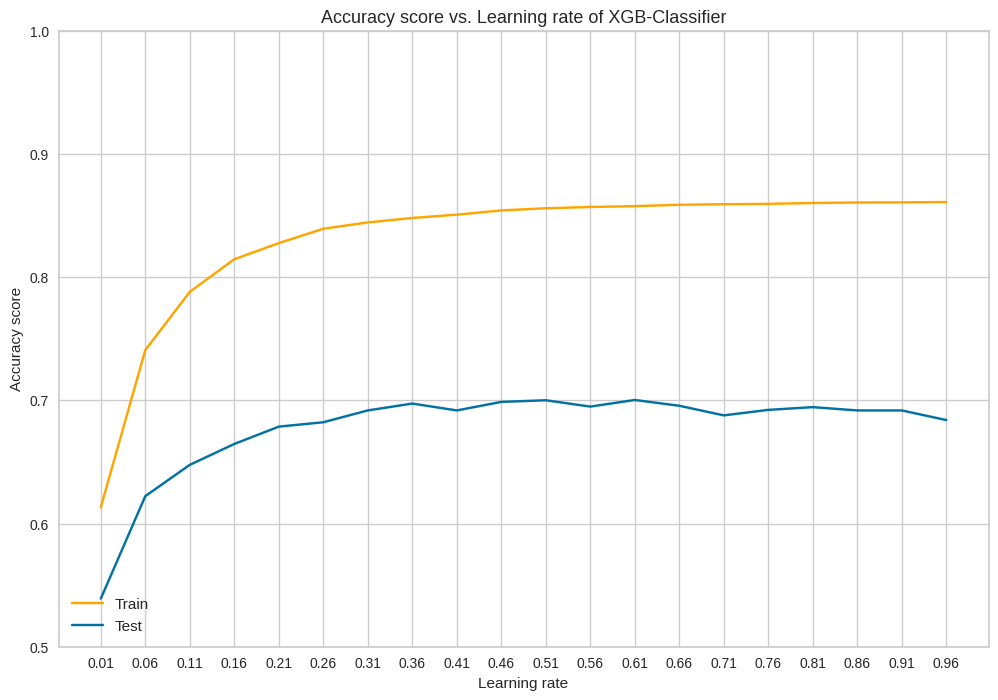

In [ ]:
# Create line plot
fig = plt.figure(figsize=(12, 8))
plt.plot(alpha_range, train_res_XGB, c='orange', label='Train')
plt.plot(alpha_range, test_res_XGB, c='b', label='Test')
plt.xlabel('Learning rate')
plt.xticks(alpha_range)
plt.ylabel('Accuracy score')
plt.ylim(0.5, 1)
plt.legend(prop={'size': 11}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGB-Classifier', size=13)
plt.show()

In [ ]:
# Build model with best alpha
BEST_A = 0.31
reg_lambda=1
min_child_weight=.5

xgb_classifier = xgb.XGBClassifier(eta=BEST_A, reg_lambda=reg_lambda, min_child_weight=min_child_weight)
xgb_classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.31, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=0.5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgb_classifier.fit(X_train, y_train_enc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.31, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=0.5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
model = xgb_classifier
predicted = model.predict(X_test)
predicted = pd.Series(predicted)
predicted += 1
predicted.value_counts()

3    1949
4    1109
2     758
5     450
1     218
dtype: int64

In [ ]:
classification_metrics(predicted, y_test)

Accuracy: 0.691793041926851
F1 Score: 0.6810863418981967
Recall Score: 0.6583154481554792
Precision Score: 0.7133920686658051


In [ ]:
model = xgb_classifier
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
cv

StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

In [ ]:
scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(model, X_test, y_test_enc, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.6099438604873388
f1_macro score: 0.6009298686935534
precision_micro score: 0.6099438604873388
precision_macro score: 0.6302869341181028
recall_micro score: 0.6099438604873388
recall_macro score: 0.5817970677721137


#### 🔥 Conclusion

Based on the use of the models above, the following is a general overview of the accuracy and F1 score. (HT = Hyperparameter Tuning)

| Model  | Accuracy | F1 (Macro)  |
|---|---|---|
| Decision Tree  | 0.5834 | 0.5727 |
| Decision Tree (w/ HT)  |  0.5929 | 0.5765  |
| Random Forest | 0.7192 |  0.7199 |
| `Random Forest (w/ HT)` | `0.7203`  | `0.7203`  |
| Softmax Regression  | 0.4012 | 0.2616 |
| Neural Network (w/ HT)  | 0.6748 | 0.6699 |
| XGB-Classifier (w/ HT)  |  0.6917 | 0.6811 |

Random Forest with Hypertuning stands out as the best-performing model compared to other models, achieving an Accuracy score of 0.7203 and an F1-Macro of 0.7203. Random Forest is able to extract the underlying patterns within the dataset and best predict labels through the set of tuned hyperparameters. The untuned version of Random Forest also beat all other models for the test data.

Both phenomenon shows how tree-based models can outperform advanced ones like Neural Networks in huge and complex datasets. Furthermore, tree-based models are also resistant to noise such as outlier data which are **naturally** observed on financial-related data.

We noticed that linear models such as Softmax Regression for multiclass classification lacks behind their tree-based or neural-based counterparts. This is due to the non-linear nature of the data that the linear model failed to capture during the training process.

### 📍 Memprediksi "long_term_projected_earnings_growth"

#### 🛠️ Preprocessing

In [ ]:
NUMERIC_COLUMNS = [column for column in df if df[column].dtype != 'object' and column != 'long_term_projected_earnings_growth']
CATEGORICAL_COLUMNS = [column for column in df if df[column].dtype == 'object']

In [ ]:
X = df.drop(["long_term_projected_earnings_growth", "ticker"], axis=1).copy()
y = df["long_term_projected_earnings_growth"]

In [ ]:
le = LabelEncoder()
for column in X:
  if X[column].dtype == 'object':
    X[column] = le.fit_transform(X[column])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

In [ ]:
scoring = {
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'r2': make_scorer(r2_score)
}

In [ ]:
def regression_metrics(scores):
    mae_mean = np.mean(scores['test_mae'])
    mse_mean = np.mean(scores['test_mse'])
    rmse_mean = np.mean(scores['test_rmse'])
    r2_mean = np.mean(scores['test_r2'])

    print('MAE\t:', mae_mean)
    print('MSE\t:', mse_mean)
    print('RMSE\t:', rmse_mean)
    print('R2\t:', r2_mean)

#### 🛠️ Feature Selection

In [ ]:
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

equity_size_score               4.558300
market_cap_medium               4.289098
historical_earnings_growth      4.212763
market_cap_large                4.168642
roe                             4.084213
                                  ...   
involvement_gmo                 0.404729
rating                          0.336475
fund_trailing_return_10years    0.276147
equity_size                     0.254504
bond_credit_quality             0.069501
Length: 97, dtype: float64

In [ ]:
KBEST = math.ceil(0.25 * len(mutual_info.index))
selected_top_columns = SelectKBest(mutual_info_regression, k=KBEST)
selected_top_columns.fit(X, y)

SelectKBest(k=25,
            score_func=<function mutual_info_regression at 0x795442a37250>)

In [ ]:
best_cols = X.columns[selected_top_columns.get_support()]
X_train, X_test = X_train[best_cols], X_test[best_cols]

In [ ]:
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

#### 📌 Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
scores = cross_validate(lr, X_train_scaled, y_train, cv=kfold, scoring=scoring)
regression_metrics(scores)

MAE	: 1.8660571236837655
MSE	: 10.693028839755446
RMSE	: 3.2665834172125017
R2	: 0.2995529305383303


#### 📌 Lasso Regression

In [ ]:
ls = Lasso(max_iter=3000)

In [ ]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 2000, 3000]
}

In [ ]:
gscr = GridSearchCV(estimator=ls, param_grid=param_grid, cv=kfold, scoring='r2')
gscr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=Lasso(max_iter=3000),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [1000, 2000, 3000]},
             scoring='r2')

In [ ]:
gscr.best_params_

{'alpha': 0.01, 'max_iter': 1000}

In [ ]:
ls = Lasso(**gscr.best_params_)
ls.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [ ]:
scores = cross_validate(ls, X_train_scaled, y_train, cv=kfold, scoring=scoring)
regression_metrics(scores)

MAE	: 1.8675581435902842
MSE	: 10.697119454046893
RMSE	: 3.267077791272571
R2	: 0.2994276316460543


#### 📌 Ridge Regression

In [ ]:
rd = Ridge(max_iter=3000)

In [ ]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
}

In [ ]:
gscr = GridSearchCV(estimator=rd, param_grid=param_grid, cv=kfold, scoring='r2')
gscr.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=Ridge(max_iter=3000),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [ ]:
gscr.best_params_

{'alpha': 100}

In [ ]:
rd = Ridge(**gscr.best_params_)
rd.fit(X_train_scaled, y_train)

Ridge(alpha=100)

In [ ]:
scores = cross_validate(rd, X_train_scaled, y_train, cv=kfold, scoring=scoring)
regression_metrics(scores)

MAE	: 1.8671244678224386
MSE	: 10.689382896700575
RMSE	: 3.265929768160904
R2	: 0.29989911612713627


#### 📌 SVM

In [ ]:
svm = SVR()
svm.fit(X_train_scaled, y_train)

SVR()

In [ ]:
scores = cross_validate(svm, X_train_scaled, y_train, cv=kfold, scoring=scoring)
regression_metrics(scores)

MAE	: 1.1550282441419708
MSE	: 7.387719895753517
RMSE	: 2.7099375370501955
R2	: 0.5188481787751323


#### 📌 KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(metric='manhattan')

In [ ]:
scores = cross_validate(knn, X_train_scaled, y_train, cv=kfold, scoring=scoring)
regression_metrics(scores)

MAE	: 0.6179405686768676
MSE	: 3.0722425930747694
RMSE	: 1.7508569778903174
R2	: 0.7964954932483627


#### 📌 KNN with Hypertunning

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
param_grid = {
    'n_neighbors': range(2, 8),
    'metric': ['euclidean', 'manhattan'],
}

In [ ]:
gscr = GridSearchCV(knn, param_grid, scoring="r2", cv=kfold)
gscr.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(2, 8)},
             scoring='r2')

In [ ]:
gscr.best_params_

{'metric': 'euclidean', 'n_neighbors': 2}

In [ ]:
knn = KNeighborsRegressor(**gscr.best_params_)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=2)

In [ ]:
scores = cross_validate(knn, X_train_scaled, y_train, cv=kfold, scoring=scoring)
regression_metrics(scores)

MAE	: 0.29552219996400975
MSE	: 1.6486243337567157
RMSE	: 1.2785869694146803
R2	: 0.8906629464466151


#### 📌 Decision Tree

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
scores = cross_validate(dtr, X_train, y_train, cv=kfold, scoring=scoring)
regression_metrics(scores)

MAE	: 0.22567130499428326
MSE	: 2.092907992583773
RMSE	: 1.427744083717439
R2	: 0.8627151033088107


#### 📌 Decision Tree with Hypertunning

In [ ]:
dtr = DecisionTreeRegressor(random_state = 123)

In [ ]:
param_grid = {
    'min_samples_split': [10, 12,20, 30],
    'max_depth': [12, 20, 30],
}

In [ ]:
gscr = GridSearchCV(dtr, param_grid, cv=5, n_jobs=-1)
gscr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [12, 20, 30],
                         'min_samples_split': [10, 12, 20, 30]})

In [ ]:
gscr.best_params_

{'max_depth': 30, 'min_samples_split': 10}

In [ ]:
dtr = DecisionTreeRegressor(**gscr.best_params_)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=30, min_samples_split=10)

In [ ]:
scores = cross_validate(dtr, X_train, y_train, cv=kfold, scoring=scoring)
regression_metrics(scores)

MAE	: 0.40037455815121215
MSE	: 2.493686862121908
RMSE	: 1.5683988119158188
R2	: 0.8357760985854877


#### 📌 Random Forest

In [ ]:
rfr = RandomForestRegressor(random_state = 122)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=122)

In [ ]:
scores = cross_validate(rfr, X_train, y_train, cv=kfold, scoring=scoring)
regression_metrics(scores)

MAE	: 0.28826666274441787
MSE	: 0.9747331257725579
RMSE	: 0.9837440073645138
R2	: 0.9352732964843942


#### 📌 Random Forest with Hypertunning

In [ ]:
rfr = RandomForestRegressor(random_state = 123)

In [ ]:
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [10, 20, 30],
}

In [ ]:
gscr = GridSearchCV(rfr, param_grid, cv=5, n_jobs=-1)
gscr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [10, 20, 30]})

In [ ]:
gscr.best_params_

{'max_depth': 30, 'n_estimators': 30}

In [ ]:
rfr = RandomForestRegressor(**gscr.best_params_)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=30)

In [ ]:
scores = cross_validate(rfr, X_train, y_train, cv=kfold, scoring=scoring)
regression_metrics(scores)

MAE	: 0.322600604233475
MSE	: 1.1018936306765759
RMSE	: 1.04585094997072
R2	: 0.9270870647864434


#### 🔥 Conclusion

Based on the use of the models above, the following is a general overview of the R Squared and MAE results.

| Model  | R Squared  | MAE  |
|---|---|---|
| Linear Regression  | 0.29 | 1.87 |
| Lasso Regression  |  0.29 | 1.87  |
| Ridge Regression  | 0.29 |  1.87 |
| SVM  | 0.52  | 1.16  |
| KNN with Hypertuning  | 0.89 | 0.29  |
| Decision Tree with Hypertuning  | 0.84 | 0.40 |
| `Random Forest with Hypertuning`  |  `0.93` | `0.32` |

Random Forest with Hypertuning stands out as the best-performing model compared to other models, achieving an R-squared of 0.93 and an MAE of 0.32. This indicates a strong ability to capture the relationships within the dataset and make accurate predictions.

Through the performance of the model we conclude that:
- The success of Random Forest highlights its ability to handle nonlinear relationships, complex interactions, and potential noise in the data. Its ensemble approach, combining multiple decision trees, contributes to robustness and generalization.
- The positive impact of hyperparameter tuning emphasizes the importance of model optimization to achieve the best possible results.

We also notice that Linear Model are underperformance. After we drilled deeper we found that:
- The poor performance of linear models suggests that the underlying patterns in the dataset cannot be adequately represented by simple linear equations.
- The features in the dataset have a nonlinear relationships with the target variable, violating the core assumption of linear models.
- Complex interactions between features, which linear models fail to capture, where this might be essential for accurate prediction.
- Linear models are sensitive to outliers, which could be unduly influencing their performance. Since in general dataset related to the world of finance, where outliers are providing valuable insights for analysts.

### 📍 Clustering dengan analisis dari jenis-jenis manajer investasi

#### 🛠️ Preprocessing

In [ ]:
NUMERIC_COLUMMS = [column for column in df if df[column].dtype != 'object']
CATEGORICAL_COLUMNS = []
df_for_cluster = df.drop(["ticker", "category"], axis=1).copy()

In [ ]:
scaler = MinMaxScaler()
df_for_cluster[NUMERIC_COLUMNS] = scaler.fit_transform(df_for_cluster[NUMERIC_COLUMNS])

In [ ]:
le = LabelEncoder()

for column in df_for_cluster:
  if df_for_cluster[column].dtype == 'object':
    df_for_cluster[column] = le.fit_transform(df_for_cluster[column])
    CATEGORICAL_COLUMNS.append(column)

We use the KMeans model because the features we have are numerical (and have also been encoded for categorical features), allowing the use of the Euclidean distance metric used by KMeans.

#### 📌 Our Analysis & Interpretation

To perform clustering and analyze types of investment managers, our group utilizes several relevant features related to the types of investment managers, namely:
- equity_style: The use of this feature has a rationale as it serves as a key indicator for categorizing types of investment managers into the following:
  - Value Investment Managers: Focus on stocks with low valuations and potential for profit.
  - Blended Investment Managers: Focus on stocks that fall between growth and value.
  - Growth Investment Managers: Focus on stocks owned by companies with potential for significant growth.
- equity_size_score: The equity size score can provide an overview of a manager's preference for the size of invested companies. This feature also represents equity_size.

Reference: https://www.fidelity.com/learning-center/investment-products/mutual-funds/2-schools-growth-vs-value"

In [ ]:
df_filtered = df_for_cluster[['equity_style', 'equity_size_score']].copy()
df_filtered.columns = ['equity_style', 'equity_size_score']
df_filtered.head()

,equity_style,equity_size_score
0,2,0.589660
1,0,0.394893
2,1,0.707015
3,2,0.560372
4,1,0.373881


For n_clusters = 2 The average silhouette_coefficient is : 0.7509418184751948
For n_clusters = 3 The average silhouette_coefficient is : 0.8807194918289197
For n_clusters = 4 The average silhouette_coefficient is : 0.7579135471115016
For n_clusters = 5 The average silhouette_coefficient is : 0.7086827259500418
For n_clusters = 6 The average silhouette_coefficient is : 0.6052902662350749
For n_clusters = 7 The average silhouette_coefficient is : 0.5518735689891173


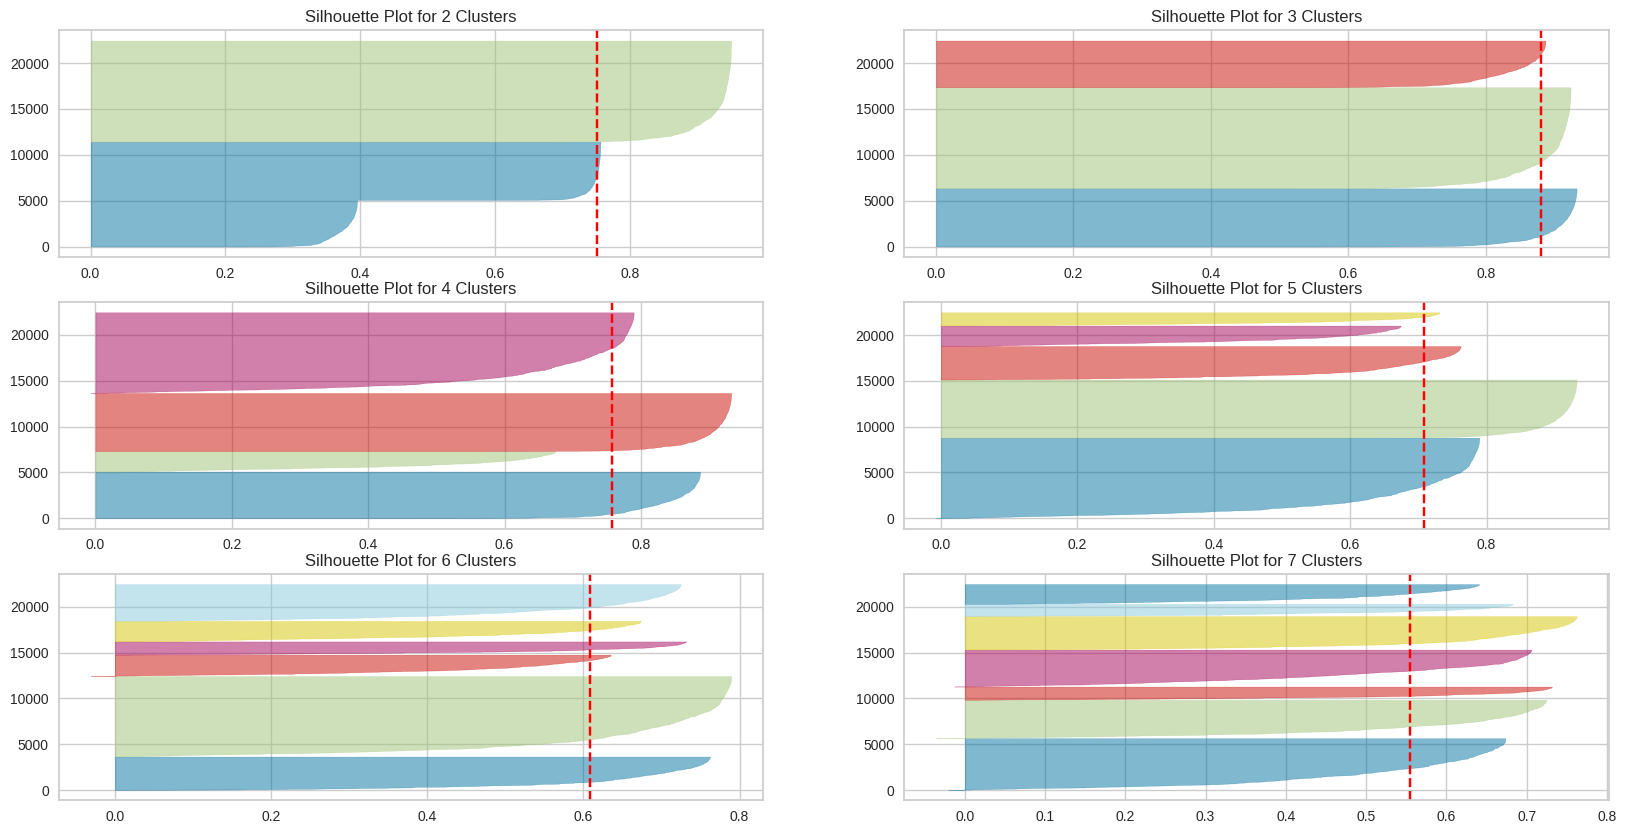

In [ ]:
num_of_cluster = [2, 3, 4, 5, 6, 7]
fig, ax = plt.subplots(3, 2, figsize=(20,10))
for k in num_of_cluster:
    clusterer = KMeans(n_clusters = k, n_init=10)

    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(df_filtered)
    visualizer.set_title(f'Silhouette Plot for {k} Clusters')

    cluster_labels = clusterer.fit_predict(df_filtered)
    silhouette_avg = silhouette_score(df_filtered, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

For the first cluster model, we found that by using only 2 features, namely `equity_style` and `equity_size_score`, the best clusters are formed with a total of 3 clusters based on the **Silhouette Score**. This is also in line with our goal to compare types of investment managers based on the three `equity_style` categories present in the dataset.

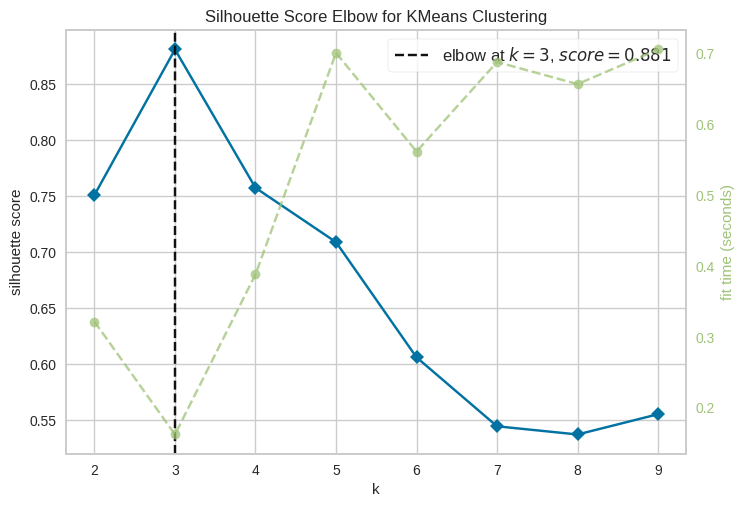

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
modeltes = KMeans(n_init = 10)
visualizer = KElbowVisualizer(modeltes, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(df_filtered)
visualizer.show()

Furthermore, we also found that the formation of the three clusters has the lowest *fit* time, in other words, a cluster count of 3 has the most **efficient** fit time.

In [ ]:
NCLUSTERS=3
cluster_model = KMeans(n_clusters=NCLUSTERS, n_init=10)
cluster_model

KMeans(n_clusters=3, n_init=10)

In [ ]:
cluster_pred = cluster_model.fit_predict(df_filtered)
data_with_clusters = pd.DataFrame(df_filtered.copy())
data_with_clusters['Clusters'] = cluster_pred

print("Cluster Assignments")
print(data_with_clusters['Clusters'].value_counts())

data_with_clusters

Cluster Assignments
1    11010
0     6330
2     5080
Name: Clusters, dtype: int64


,equity_style,equity_size_score,Clusters
0,2,0.589660,0
1,0,0.394893,1
2,1,0.707015,2
3,2,0.560372,0
4,1,0.373881,2
...,...,...,...
22415,1,0.252585,2
22416,2,0.431021,0
22417,0,0.640621,1
22418,1,0.000000,2


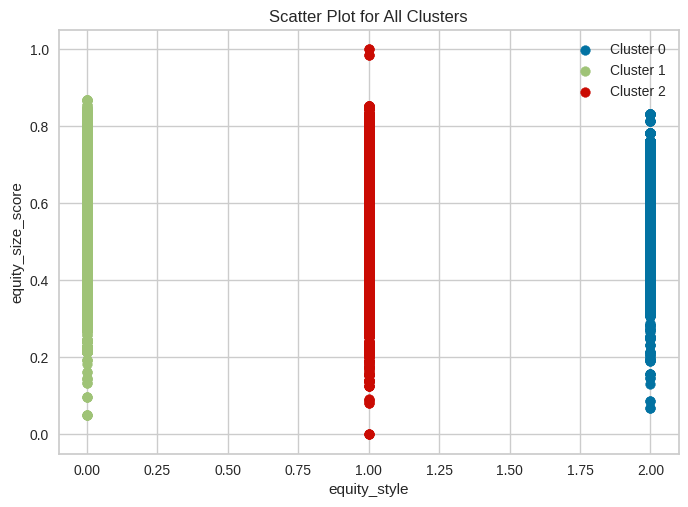

In [ ]:
for target_cluster in range(NCLUSTERS):
    filtered_data = data_with_clusters[data_with_clusters['Clusters'] == target_cluster]
    plt.scatter(filtered_data['equity_style'], filtered_data['equity_size_score'], label=f'Cluster {target_cluster}')

plt.xlabel('equity_style')
plt.ylabel('equity_size_score')
plt.title('Scatter Plot for All Clusters')
plt.legend()
plt.show()

At the end of the visualization, it can be seen that clusters can form well, where the depiction of clusters is clearly visualized as shown in the above image. Clusters are separated due to the categorical nature of equity_style values.

Interpretation of KMeans clustering analysis results:
- Cluster 0: In Cluster 0, our group found that this cluster represents the `Value` classification. Values are evenly distributed with a maximum point around the equity_size_score below 0.9. This cluster can be considered as an investment group with value characteristics. Stocks in this cluster tend to have low `equity_size_score`, indicating a tendency to invest in small to medium-sized market cap stocks. In our view, investors in this cluster are more focused on stocks with fundamental values considered low relative to market prices.

- Cluster 1: Cluster 1 represents the `Blend` classification, where values are evenly spread in the range of approximately 0.1 - 0.9. Some values touch 1, and some are below 0.1. This cluster can be considered as an investment group with a mix of value and growth characteristics. Stocks in this cluster have a wider variation in market size (equity_size_score), covering small, medium, and large-cap stocks. There are some stocks with equity_size_score approaching 1, indicating the presence of growth elements in the portfolio. In our opinion, investors in this cluster take a mixed approach between value and growth, with portfolios including a variety of market sizes from small to large-cap stocks.

- Cluster 2: Cluster 2 represents the `Growth` classification, where values are evenly spread in the range of approximately 0.2 - 0.9. Some values are above 0.8, and some are below 0.2 (but none are 0). This cluster can be considered as an investment group with growth characteristics. Stocks in this cluster tend to have slightly higher equity_size_score compared to Cluster 0, indicating a tendency to invest in medium to large market cap stocks. No stocks have an equity_size_score equal to 0, indicating that stocks in this cluster have a minimum market size in the medium category. In our view, investors in this cluster are more focused on stocks with high perceived growth potential.

**Conclusion:**

Based on the clustering results, we can identify three main groups in investment strategy. Cluster 0, referred to as "Value-Oriented," shows investors' inclination toward stocks with low fundamental values, especially in small to medium-sized market cap stocks. Meanwhile, Cluster 1, interpreted as "Balanced Growth," includes investors who choose a mixed approach between value and growth, with portfolios covering a variety of market sizes. On the other hand, Cluster 2, labeled "Growth-Focused," describes investors focused on stocks with high growth potential, especially those with medium to large market cap. As a result, creating new labels such as "Value-Oriented," "Balanced Growth," and "Growth-Focused" can help investors better understand and manage their investment strategies according to the characteristics and risk objectives of each.


> **Notes**: It should be noted that this model only depicts selected features of our interpretation. We are aware that these features are used with the assumption that types of investment managers are drawn based on `Assumption 1: investment styles of each investment manager in the dataset`. In our view, this model does not adequately represent another assumption, namely `Assumption 2: Based on all columns of each investment manager in the dataset`, so we are continuing it in the second model.

#### 📌 Using Principal Component Analysis (PCA)


To perform clustering and analyze types of investment managers, we also attempted to use Principal Component Analysis (PCA) for several reasons:
1. PCA can help reduce the dimensionality of data by summarizing significant variance in the dataset into principal components. PCA enables a simpler and more efficient representation of data without losing essential information.

2. PCA can address multicollinearity issues among features, producing more orthogonal independent variables. In the context of clustering, this can enhance the interpretation and efficiency of clustering algorithms.

3. By reducing dimensions, PCA can improve the performance of clustering algorithms by alleviating the "curse of dimensionality," especially in high-dimensional datasets. By summarizing features that do not contribute significantly to total variance, PCA can enhance clustering quality and reduce the impact of irrelevant variability. Thus, using PCA in clustering can yield more interpretative and efficient results, especially in large datasets or those with numerous features.


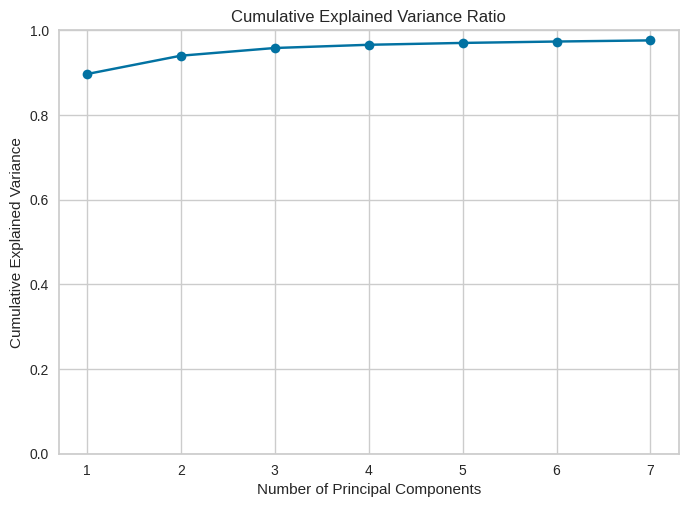

In [ ]:
pca = PCA(n_components=7)
principal_components = pca.fit_transform(df_for_cluster)
columns = [f'PC{i+1}' for i in range(pca.n_components_)]
df_pca = pd.DataFrame(data=principal_components, columns=columns)
X = df_pca

explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)


plt.plot(range(1, 8), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.title('Cumulative Explained Variance Ratio')
plt.xticks(range(1, 8))
plt.ylim(0, 1)
plt.grid(True)
plt.show()

Based on the cumulative variance values from the PCA results, we will be using `PC1` and `PC2` as their variances have demonstrated significant values, explaining 90 - 95% of the variance in the data.

In [ ]:
pca = PCA(n_components=2)
components, features = pca.fit_transform(df_for_cluster), [f'PC{i+1}' for i in range(pca.n_components_)]
X = pd.DataFrame(data=components, columns=features)

For n_clusters = 2 The average silhouette_coefficient is : 0.633571367020714
For n_clusters = 3 The average silhouette_coefficient is : 0.5641551611131099
For n_clusters = 4 The average silhouette_coefficient is : 0.4468818942370242
For n_clusters = 5 The average silhouette_coefficient is : 0.4551643216938377
For n_clusters = 6 The average silhouette_coefficient is : 0.4388258008236704
For n_clusters = 7 The average silhouette_coefficient is : 0.40785526428057683


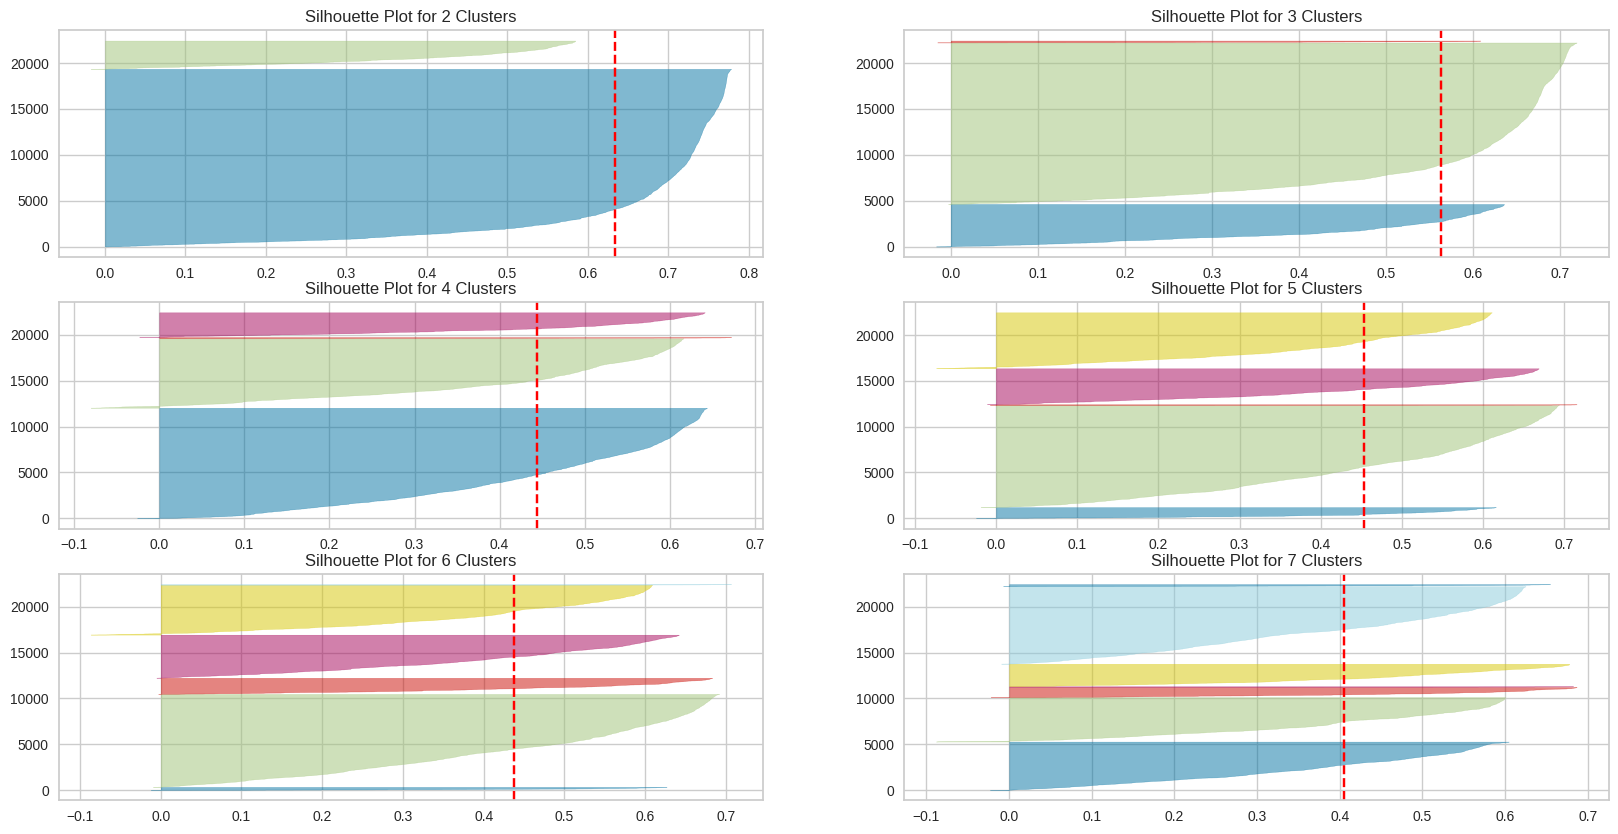

In [ ]:
num_of_cluster = [2, 3, 4, 5, 6, 7]

fig, ax = plt.subplots(3, 2, figsize=(20,10))
for k in num_of_cluster:
    clusterer = KMeans(n_clusters = k, n_init=10)

    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)
    visualizer.set_title(f'Silhouette Plot for {k} Clusters')

    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

For the cluster model, we found that by using only 2 principal components, namely `PC1` and `PC2`, the best clusters were formed with a total of 2 clusters based on the `Silhouette Score` values.

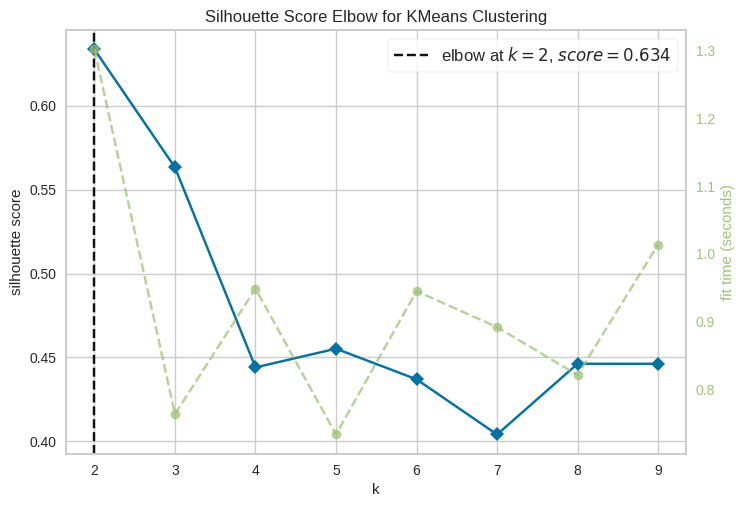

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
modeltes = KMeans(n_init = 10)
visualizer = KElbowVisualizer(modeltes, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(X)
visualizer.show()

In [ ]:
cluster_model = KMeans(n_clusters=2, n_init=10)
cluster_model.fit(X)

KMeans(n_clusters=2, n_init=10)

In [ ]:
cluster_pred = cluster_model.fit_predict(X)
data_with_clusters = pd.DataFrame(X.copy())
data_with_clusters['Clusters'] = cluster_pred

data_with_clusters

,PC1,PC2,Clusters
0,-1.511246,1.198121,1
1,-0.762426,-0.651651,1
2,6.721865,0.209179,0
3,-2.405584,1.169659,1
4,-0.102645,0.354028,1
...,...,...,...
22415,30.012619,0.921093,0
22416,-5.103123,1.320617,1
22417,-0.977407,-0.830161,1
22418,35.436353,0.990915,0


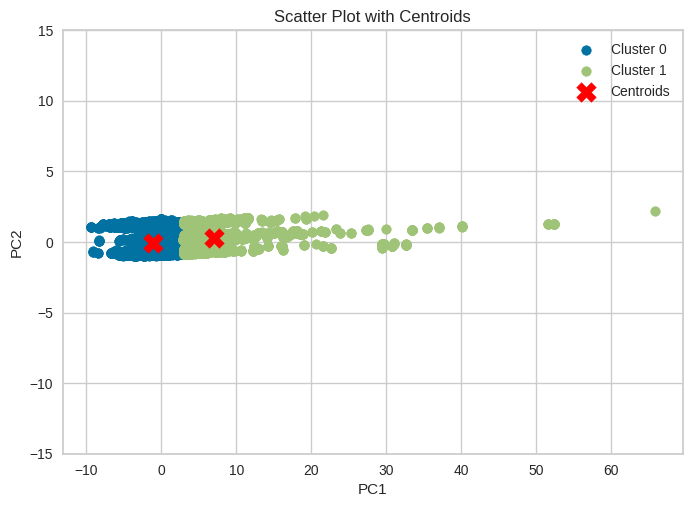

In [ ]:
k_value = 2
kmeans = KMeans(n_clusters=k_value, random_state=42, n_init=10)
data_with_clusters['Clusters'] = kmeans.fit_predict(data_with_clusters[['PC1', 'PC2']])

for target_cluster in range(k_value):
    filtered_data = data_with_clusters[data_with_clusters['Clusters'] == target_cluster]
    plt.scatter(filtered_data['PC1'], filtered_data['PC2'], label=f'Cluster {target_cluster}')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot with Centroids')
plt.axis([plt.xlim()[0], plt.xlim()[1], -15, 15])
plt.legend()
plt.show()

At the end of the visualization, it can be observed that clusters can form well, where the depiction of clusters can be clearly visualized as shown in the above image.

Based on the features provided in the dataset, Interpretation of KMeans clustering analysis results on PCA:

- Cluster 0: In Cluster 0, this cluster tends to have PC1 values in the range of -10 to 3 and PC2 values in the range of -1 to 1.7. Our group can interpret this cluster as a group of investment managers with a threshold PC1 below 3. The variance of this cluster also tends to be less, with a smaller range of PC1 and PC2.

- Cluster 1: Cluster 1 tends to have PC1 values in the range of 2 to 13 with some values far from the centroid. PC2 values range from -0.8 to 2, where we can interpret this cluster as a group of investment managers with a threshold PC1 above 3.

**Conclusion**

Based on the clustering results using the KMeans method and Principal Component Analysis (PCA), two distinct groups of investment managers can be identified. Cluster 0 is characterized by PC1 values below 3 and PC2 values relatively concentrated in the range of -1 to 1.7, while Cluster 1 has PC1 values above 3 and a larger variation in PC2 values, ranging from -0.8 to 2. The conclusion from these patterns suggests that Cluster 0 has a more limited scope of variability and may be more consistent in its investment strategy, while Cluster 1 shows more significant variations and may have a more dynamic investment approach or a larger portfolio diversification.

#### 📌 Using Hierarchical Clustering

We also conducted clustering using Hierarchical Clustering with the `AgglomerativeClustering` model to understand if there is a hierarchical structure in the types of investment managers' data. Additionally, this method provides flexibility in determining the number of clusters and produces a dendrogram structure that facilitates the interpretation of the level of interconnection between clusters.

**Reference**: https://crunchingthedata.com/when-to-use-hierarchical-clustering

In [ ]:
X_cont = df_for_cluster[NUMERIC_COLUMNS].copy()
y = df_for_cluster['equity_style']

mi = mutual_info_classif(X_cont, y)
mi = pd.Series(mi)
mi.index = X_cont.columns
mi = mi.sort_values(ascending=False)

In [ ]:
KBEST = math.ceil(0.1 * len(mi.index))
percentile_10 = SelectKBest(mutual_info_classif, k=KBEST)
percentile_10.fit(X_cont, y)

best_cols = X_cont.columns[percentile_10.get_support()]
X_cont = X_cont[best_cols]
num_top_n = df_for_cluster[X_cont.columns]

num_top_n.head()

,equity_size_score,price_prospective_earnings,price_cash_flow_ratio,historical_earnings_growth,sector_technology,market_cap_giant,market_cap_large,market_cap_medium,involvement_animal_testing,fund_size
0,0.589660,0.016391,0.093186,0.120150,0.151163,0.311369,0.314174,0.689297,0.117889,0.008739
1,0.394893,0.051074,0.193356,0.135859,0.256854,0.162087,0.019688,0.874262,0.149539,0.011542
2,0.707015,0.064864,0.164055,0.121478,0.276045,0.470834,0.178698,0.670812,0.028345,0.002360
3,0.560372,0.034655,0.098807,0.120304,0.202874,0.311923,0.269292,0.713421,0.132612,0.004448
4,0.373881,0.020558,0.048041,0.096280,0.151825,0.155936,0.102964,0.780790,0.129708,0.000301


In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    shc.dendrogram(linkage_matrix, **kwargs)

In [ ]:
X = df_for_cluster[num_top_n.columns]

In [ ]:
model = AgglomerativeClustering(compute_distances=True, distance_threshold = None, n_clusters = 3, linkage = 'ward', metric = 'euclidean')
clustering = model.fit(X)

print("Cluster Values")
pd.Series(clustering.labels_).value_counts()

Cluster Values


1    12494
0     6538
2     3388
dtype: int64

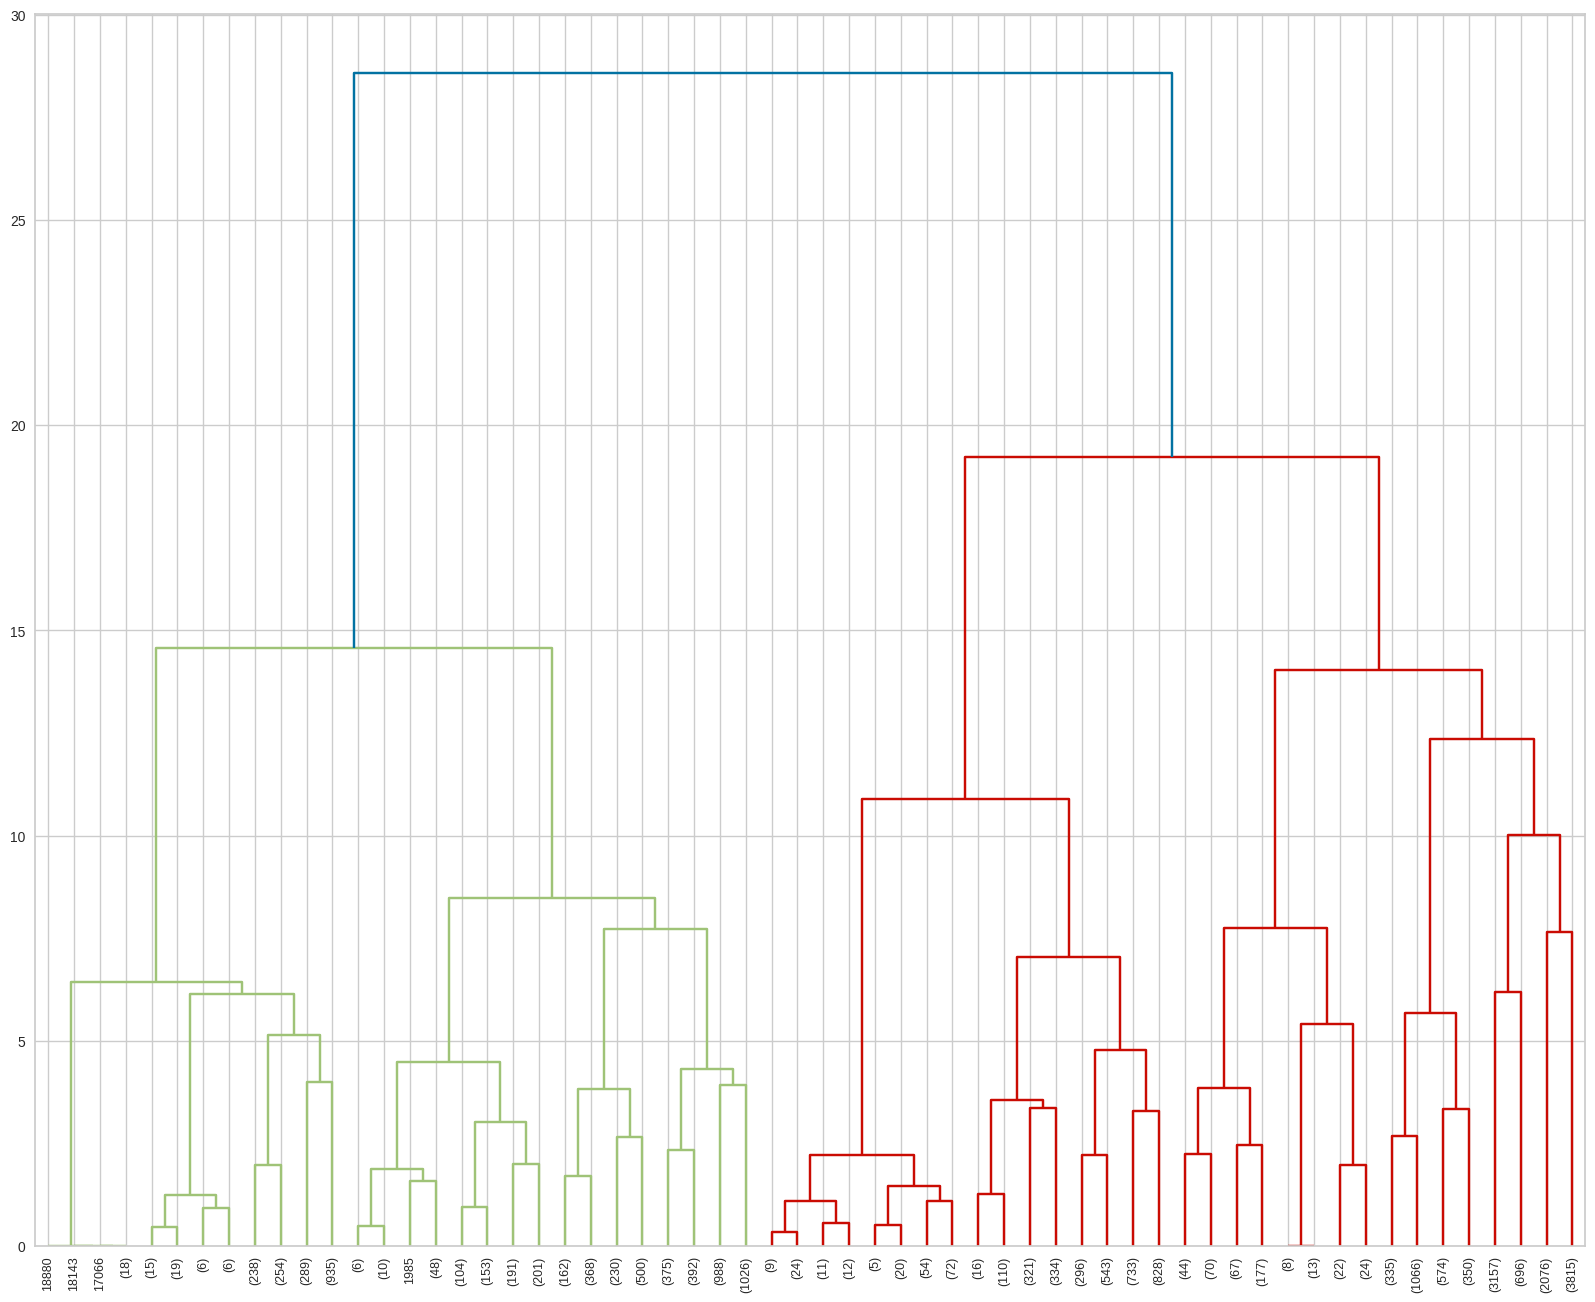

In [ ]:
fig, ax = plt.subplots(figsize=(20, 16))

HYPERPARAMS = {
     'truncate_mode': 'level',
     'p': 5,
     'leaf_rotation': 90,
     'leaf_font_size': 9,
     'ax': ax,
}


plot_dendrogram(model, **HYPERPARAMS)

In [ ]:
# Extract the data points assigned to each cluster
cluster_0 = X[clustering.labels_ == 0]
cluster_1 = X[clustering.labels_ == 1]
cluster_2 = X[clustering.labels_ == 2]

# Calculate the mean of each feature for each cluster
cluster_0_mean = np.mean(cluster_0, axis=0)
cluster_1_mean = np.mean(cluster_1, axis=0)
cluster_2_mean = np.mean(cluster_2, axis=0)

# Create a dataframe to hold the results
cluster_stats = pd.DataFrame({'Cluster 0': cluster_0_mean,
                             'Cluster 1': cluster_1_mean,
                             'Cluster 2': cluster_2_mean})

# Print the dataframe
print(cluster_stats)

                            Cluster 0  Cluster 1  Cluster 2
equity_size_score            0.455462   0.656901   0.604773
price_prospective_earnings   0.033807   0.045127   0.037396
price_cash_flow_ratio        0.111785   0.165156   0.157623
historical_earnings_growth   0.125527   0.124700   0.118770
sector_technology            0.165608   0.246486   0.157149
market_cap_giant             0.212680   0.393733   0.350634
market_cap_large             0.204650   0.269505   0.307890
market_cap_medium            0.765074   0.688237   0.699160
involvement_animal_testing   0.099384   0.119815   0.354319
fund_size                    0.011500   0.018535   0.017608


Transpose the cluster_stats dataframe for easier plotting

In [ ]:
cluster_stats_transposed = cluster_stats.T

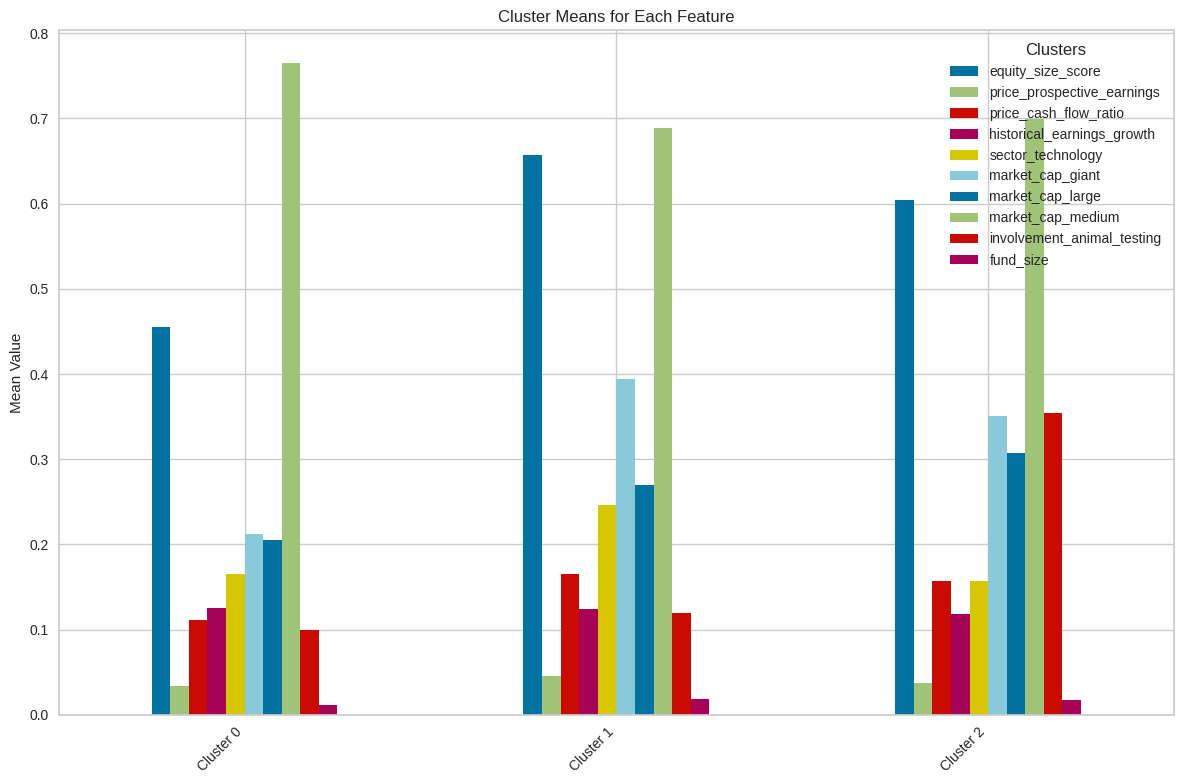

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
cluster_stats_transposed.plot(kind='bar', ax=ax)
ax.set_ylabel('Mean Value')
ax.set_title('Cluster Means for Each Feature')
ax.legend(title='Clusters')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Based on the features provided in the dataset, Interpretation of KMeans clustering analysis on PCA:**

- Cluster 0: This cluster tends to be an investment group with a higher-risk profile, focusing on stocks with a medium market cap and having lower involvement in animal testing.

- Cluster 1: This cluster characterizes an investment group with a lower-risk profile, especially in the technology sector, and has a significant proportion of stocks with giant and large market caps.

- Cluster 2: This cluster shows a moderate-risk profile, focusing on stocks with a medium market cap and higher involvement in animal testing.

**Conclusion**:

Based on the clustering results using Hierarchical Clustering, the clustering results using the *Agglomerative Clustering* method identify three investment groups that can be distinguished based on risk profile, sector preferences, and market capitalization characteristics. Cluster 0 tends to have a higher-risk profile, focusing on stocks with a medium market cap, and lower involvement in animal testing. Cluster 1 characterizes an investment group with a lower-risk profile, especially in the technology sector, and has a significant proportion of stocks with giant and large market caps. Meanwhile, Cluster 2 shows a moderate-risk profile, focusing on stocks with a medium market cap and higher involvement in animal testing.